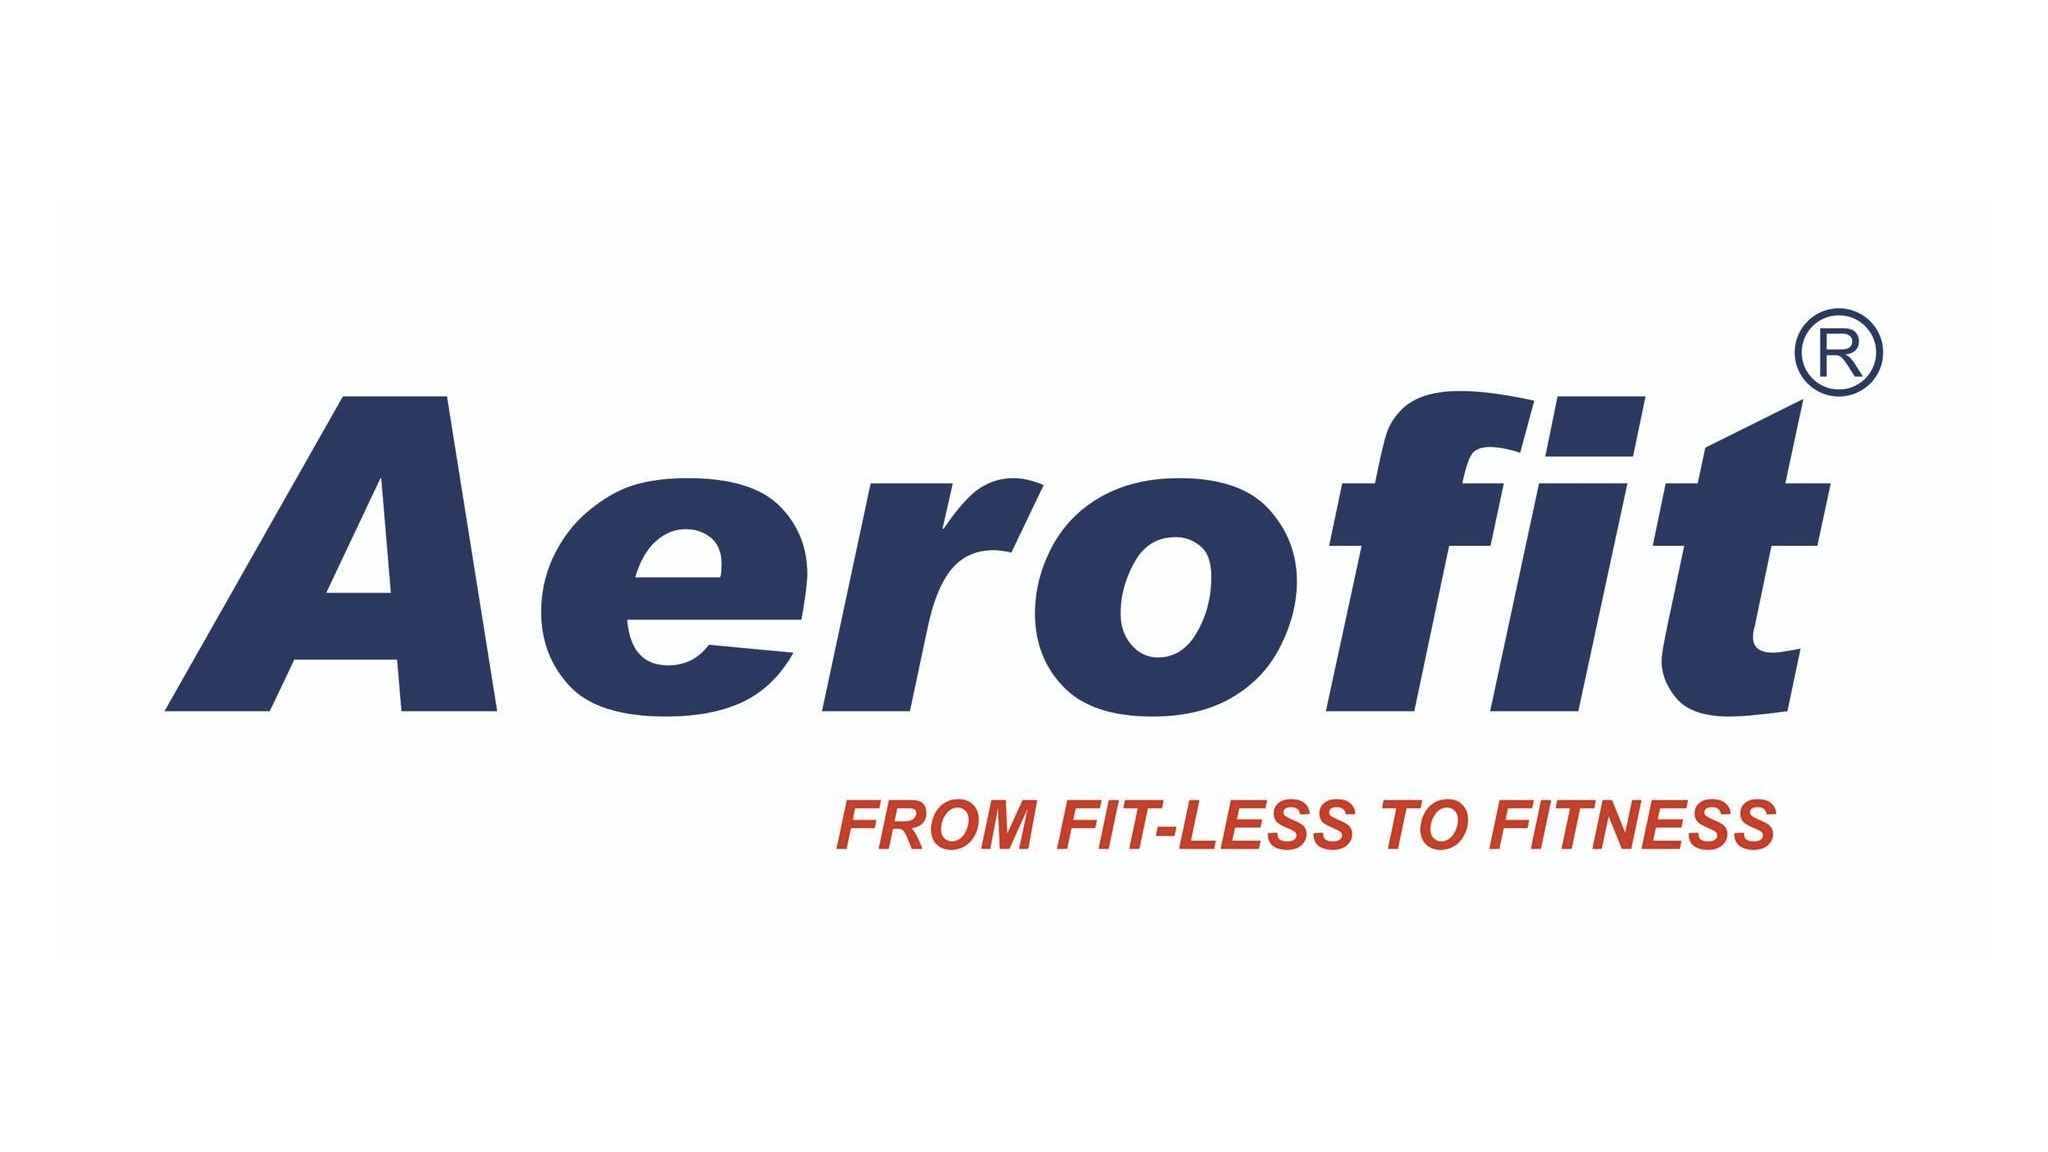

# AEROFIT - DESCRIPTIVE STATISTICS & PROBABILITY

PROBLEM STATEMENT

1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [1]:
# Let's import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Let's read the file
aerofit = pd.read_csv('aerofit_treadmill.csv')

In [3]:
# Let's get an idea about the data and the table structure.
aerofit.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [4]:
# Basic technical information about the Aerofit Database.
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Comments:
1. There are in total 9 columns and 180 rows, where rows range from index 0 to 179.
2. All columns except Product, Gender and MaritalStatus have datatype as int64, where as these have object datatype.
3. There are no null values in any of the columns.

In [5]:
# Let's get an idea about the shape of the table.
aerofit.shape

(180, 9)

Comments:
1. We can see, the shape also indicates 180 rows and 9 columns.

In [6]:
# Let's check, if there are any missing values in the data.
aerofit.isna().sum().sum()

0

Comments:
1. We can see from above that there are no missing values in our Data.

In [7]:
# Let's check, if there are any Duplicate values in the data.
aerofit[aerofit.duplicated()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


Comments:
1. We can see from above that there are no dupliacted rows in our Data.
Hence we are good to go.

In [8]:
# On close inspection we can see that, columns Product, Gender, MaritalStatus, 
# Usage and Fitness are categoorical in nature, So let's change their datatypes.
aerofit[['Product','Gender','MaritalStatus','Usage','Fitness']] = aerofit[['Product','Gender','MaritalStatus','Usage','Fitness']].astype('category')

In [9]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    category
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(5), int64(4)
memory usage: 7.4 KB


Comments:
1. We can see that now, appropriate columns have been changed to datatype 'Category'.

In [10]:
# Let's dive into individual columns and analyse them.
# Let's first analyse the Product column.
aerofit[['Product']].head()

,Product
0,KP281
1,KP281
2,KP281
3,KP281
4,KP281


In [11]:
aerofit.Product.unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

In [12]:
aerofit.Product.value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

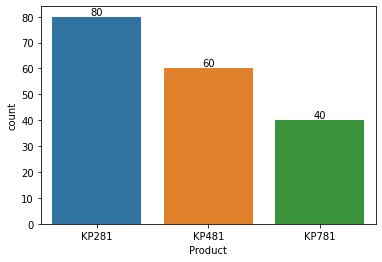

In [13]:
ax = sb.countplot(data=aerofit,x='Product')
plt.bar_label(ax.containers[0], label_type='edge')
plt.show()

Comments:
1. We can see here, that, there are 3 types of Products, ie, KP281, KP481 and KP781.
2. Also, number of orders for KP281 is 80, which is maximum, followed by KP481(60) and KP781(40).

In [14]:
# Let's Analyse the column Age.
aerofit[['Age']].head()

,Age
0,18
1,19
2,19
3,19
4,20


In [15]:
aerofit.Age.unique(),aerofit.Age.nunique()

(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42]),
 32)

In [16]:
aerofit.Age.value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
47     2
45     2
44     1
46     1
18     1
43     1
42     1
41     1
39     1
36     1
50     1
Name: Age, dtype: int64

In [17]:
aerofit.Age.describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

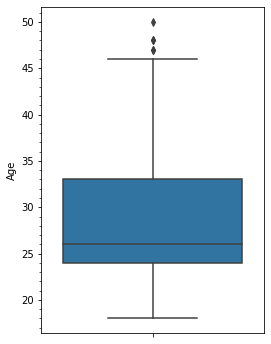

In [18]:
# Let's analyse the Age column using box plot.
plt.figure(figsize=(4,6))
sb.boxplot(data=aerofit,y='Age')
plt.minorticks_on()
plt.show()

We can see, that, there are a few outliers, let's check them.

In [19]:
aerofit[aerofit['Age']>46]['Age']

78     47
79     50
139    48
178    47
179    48
Name: Age, dtype: int64

Comments:
1. As we can see from above, there are in total 32 unique ages, ranging from 18 to 50 years.
2. The mean age is 28.78 years, where the median is 26 years.
3. 25th percentile is 24 years,and 75th percentile is 33 years.
4. The mode for column Age is 25 with frequency 25.
5. Standard Deviation is 6.9, which is a low, hence the data is consistent.
6. Age 18 to 46, acoording to the boxplot, are well within the range of consistent data where as there are a few outlier ages, ie, 47,48 and 50.

In [20]:
# Let's Analyse the column Gender.
aerofit[['Gender']].head()

,Gender
0,Male
1,Male
2,Female
3,Male
4,Male


In [21]:
aerofit.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

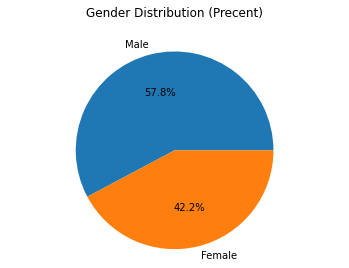

In [22]:
gender_counts = aerofit['Gender'].value_counts()
plt.pie(x=gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Gender Distribution (Precent)',pad=25)
plt.show()


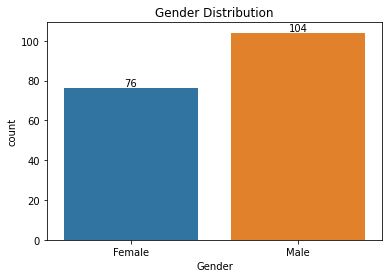

In [23]:
ax = sb.countplot(data=aerofit,x='Gender')
plt.bar_label(ax.containers[0], label_type='edge')
plt.title('Gender Distribution')
plt.show()

In [24]:
# Let's also establish a general relationship between Product and age using crosstab.
pd.crosstab(aerofit['Product'],aerofit['Gender'],margins=True,margins_name='Total')

Gender,Female,Male,Total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
Total,76,104,180


Comments:
1. We can see from above, There are in total 104 Male Customers and 76 Female Customers.
2. We can also infer that Aerofit's buyer landscape is occupied majorly by Male Customers, 57.8% customers are male and 42.2% customers are female.

In [25]:
# Let's Analyse the column Gender.
aerofit[['Education']].head()

,Education
0,14
1,15
2,14
3,12
4,13


In [26]:
aerofit['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [27]:
aerofit.Education.value_counts()

16    85
14    55
18    23
13     5
15     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [28]:
aerofit.Education.describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

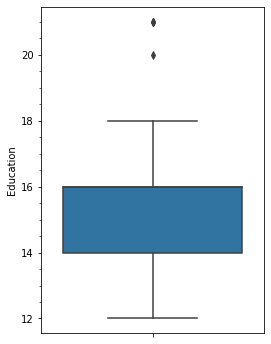

In [29]:
# Let's analyse the Eduucatin column using box plot.
plt.figure(figsize=(4,6))
sb.boxplot(data=aerofit,y='Education')
plt.minorticks_on()
plt.show()

In [30]:
aerofit.Education.median()

16.0

In [31]:
# Checking the outliers
aerofit[aerofit['Education']>18]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


In [32]:
# Let's also establish a general relationship between Product and education using crosstab.
pd.crosstab(aerofit['Product'],aerofit['Education'],margins=True,margins_name='Total')

Education,12,13,14,15,16,18,20,21,Total
Product,,,,,,,,,
KP281,2,3,30,4,39,2,0,0,80
KP481,1,2,23,1,31,2,0,0,60
KP781,0,0,2,0,15,19,1,3,40
Total,3,5,55,5,85,23,1,3,180


Comments:
1. From the above analysis, it can be observed that, minimum number of years that a customer has studied is 12 years which corresponds to 12th graduate and maximum number of years a customer has studied for is 21 years, which seems like a Doctorate.
2. The mean number of years the customers of Aerofit are educated for is 15.5 years, which corresponds to an under graduate degree.
3. The median for the above data is 16, which is very close to mean, also can be observed that Standard Deviation is miniscule, ie, 1.6 years, hence it can be infered that the data is very consistent.
4. The 25th percentile is marked at 14 years, 50th percentile at 16 years and 75th percetile also at 16 years.
5. We can also see from the outlier detection from above, that People with an education of 20,21 years are an exception.
6. Also from the crosstab analysis, it can be infered that, 16 years of education is the mode with frequency 85.

In [33]:
# Now, Let's analyse the MaritalStatus column.
aerofit[['MaritalStatus']].head()

,MaritalStatus
0,Single
1,Single
2,Partnered
3,Single
4,Partnered


In [34]:
aerofit['MaritalStatus'].unique()

['Single', 'Partnered']
Categories (2, object): ['Single', 'Partnered']

In [35]:
aerofit['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

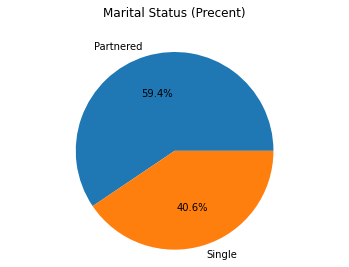

In [36]:
maritalstatus_counts = aerofit['MaritalStatus'].value_counts()
plt.pie(x=maritalstatus_counts, labels=maritalstatus_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Marital Status (Precent)',pad=25)
plt.show()


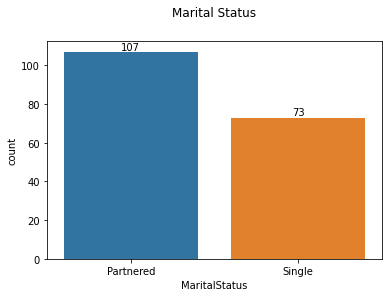

In [37]:
ax = sb.countplot(data=aerofit,x='MaritalStatus')
plt.bar_label(ax.containers[0], label_type='edge')
plt.title('Marital Status',pad=25)
plt.show()

In [38]:
# Let's also establish a general relationship between Product and marital status using crosstab.
pd.crosstab(aerofit['Product'],aerofit['MaritalStatus'],margins=True,margins_name='Total')

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
Total,107,73,180


Comments:
1. We can see from above, There are in total 107 Partenered Customers and 73 Single Customers.
2. We can also infer that Aerofit's buyer landscape is occupied majorly by Partnered Customers, where, 59.4% customers are Partnered and 40.6% customers are Single, indicating a wider user base of married off customers.
3. A close inspection of the crosstab also infers that, not only all over but in individual categorie of product also, partnered customers are more in numbers.

In [39]:
# Let's now evaluate the Usage column.
aerofit[['Usage']].head()

,Usage
0,3
1,2
2,4
3,3
4,4


In [40]:
aerofit['Usage'].unique()

[3, 2, 4, 5, 6, 7]
Categories (6, int64): [3, 2, 4, 5, 6, 7]

In [41]:
aerofit['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

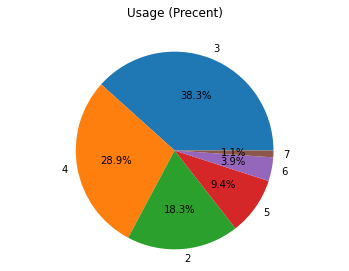

In [42]:
usage_counts = aerofit['Usage'].value_counts()
plt.pie(x=usage_counts, labels=usage_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Usage (Precent)',pad=25)
plt.show()


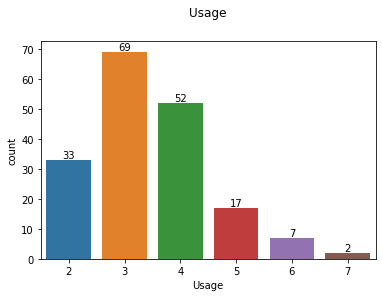

In [43]:
ax = sb.countplot(data=aerofit,x='Usage')
plt.bar_label(ax.containers[0], label_type='edge')
plt.title('Usage',pad=25)
plt.show()

In [44]:
# Let's also establish a general relationship between Product and usage status using crosstab.
pd.crosstab(aerofit['Product'],aerofit['Usage'],margins=True,margins_name='Total')

Usage,2,3,4,5,6,7,Total
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
Total,33,69,52,17,7,2,180


Comments:
1. From the above analysis of Usage column, it can be infered that, usage of 3 days a week is the most prominent, followed by 4 days.
2. It's also surprising to notice that, for Products KP281 and KP481, there's not a single customer who prefers to use the treadmilss for 6 or 7 days, where as in KP781, using the treadmil of 2 days is not at all a concept.
We'll discuss later how individually in each category, which uasge slab is most prefered.

In [45]:
# Let's now analyse the Fitness column
aerofit[['Fitness']]

,Fitness
0,4
1,3
2,3
3,3
4,2
...,...
175,5
176,4
177,5
178,5


In [46]:
aerofit['Fitness'].unique()

[4, 3, 2, 1, 5]
Categories (5, int64): [4, 3, 2, 1, 5]

In [47]:
aerofit['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

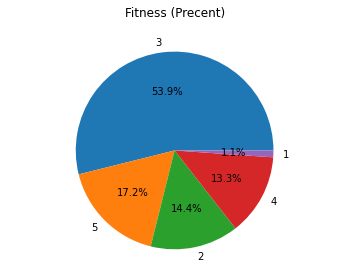

In [48]:
fitness_counts = aerofit['Fitness'].value_counts()
plt.pie(x=fitness_counts, labels=fitness_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Fitness (Precent)',pad=25)
plt.show()


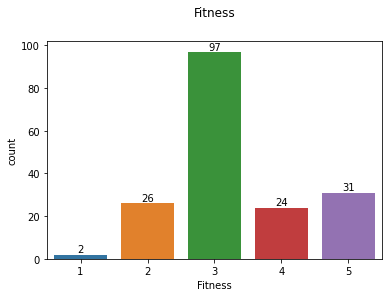

In [49]:
ax = sb.countplot(data=aerofit,x='Fitness')
plt.bar_label(ax.containers[0], label_type='edge')
plt.title('Fitness',pad=25)
plt.show()

In [50]:
# Let's also establish a general relationship between Product and Fitness status using crosstab.
pd.crosstab(aerofit['Product'],aerofit['Fitness'],margins=True,margins_name='Total')

Fitness,1,2,3,4,5,Total
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
Total,2,26,97,24,31,180


Comments:
1. From the above analysis, it can be observed that, fitness rating 3 is the most prominent, though individually, in KP281 and KP481, rating 3 is prominent, but in KP781, rating 5 is more prominent. We'll delve further in details later.

In [51]:
# Let's now analyse the Income column. It's the most important column, 
# because someone's income is the most important driving factor for them to buy a product.
aerofit[['Income']]

,Income
0,29562
1,31836
2,30699
3,32973
4,35247
...,...
175,83416
176,89641
177,90886
178,104581


In [52]:
aerofit['Income'].unique(),aerofit['Income'].nunique()

(array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
         40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
         53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
         60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
         65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
         57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
         69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
        103336,  99601,  89641,  95866, 104581,  95508]),
 62)

In [53]:
aerofit['Income'].value_counts()

45480     14
52302      9
54576      8
53439      8
46617      8
          ..
103336     1
69721      1
75946      1
85906      1
54781      1
Name: Income, Length: 62, dtype: int64

In [54]:
aerofit['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

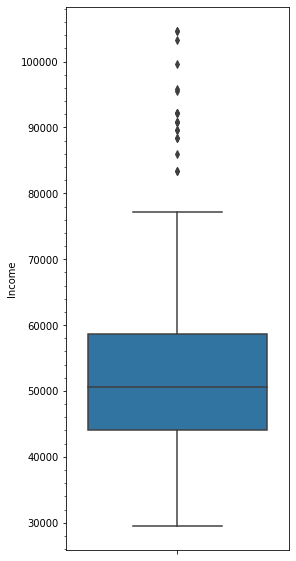

In [55]:
# Let's analyse the Income column using box plot.
plt.figure(figsize=(4,10))
sb.boxplot(data=aerofit,y='Income',whis=1.5)
plt.minorticks_on()
plt.show()

In [56]:
IQR = aerofit['Income'].describe().loc['75%'] - aerofit['Income'].describe().loc['25%']
whisker_len = 1.5*IQR
upper_whisker = aerofit['Income'].describe().loc['75%'] + whisker_len
lower_whisker = aerofit['Income'].describe().loc['25%'] - whisker_len
lower_whisker,upper_whisker

(22144.875, 80581.875)

In [57]:
# Detecting the outliers
aerofit[aerofit['Income']>upper_whisker].sort_values(by='Income')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
175,KP781,40,Male,21,Single,6,5,83416,200
166,KP781,29,Male,14,Partnered,7,5,85906,300
160,KP781,27,Male,18,Single,4,3,88396,100
164,KP781,28,Male,18,Single,6,5,88396,150
176,KP781,42,Male,18,Single,5,4,89641,200
170,KP781,31,Male,16,Partnered,6,5,89641,260
161,KP781,27,Male,21,Partnered,4,4,90886,100
177,KP781,45,Male,16,Single,5,5,90886,160
167,KP781,30,Female,16,Partnered,6,5,90886,280


Comments:
1. The over all mean, median and mode for the above distribution are 53719.57, 50596.5 and 45480 USD respectively.
2. It can be observed that mean and median vary by a considerable amount, indicating towards non robustness of mean and hence we shall rely onmedian for our analysis.
3. Also the standard deviation is 16506.6, which is huge and hence points towards inconsistency of the data.
4. There are a plethora of outliers which have been demonstrated for the over all income distribution. We'll delve into the individual product types and corresponding income distributions, later.

In [58]:
#  Now let's analyse the Miles column.
aerofit[['Miles']]

,Miles
0,112
1,75
2,66
3,85
4,47
...,...
175,200
176,200
177,160
178,120


In [59]:
aerofit['Miles'].unique(),aerofit['Miles'].nunique()

(array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
        169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
        140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360]),
 37)

In [60]:
aerofit['Miles'].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
100     7
53      7
64      6
56      6
200     6
180     6
127     5
160     5
150     4
42      4
120     3
103     3
170     3
74      3
38      3
132     2
141     2
169     1
188     1
212     1
260     1
140     1
112     1
360     1
21      1
80      1
300     1
280     1
240     1
Name: Miles, dtype: int64

In [61]:
aerofit['Miles'].min(),aerofit['Miles'].max()

(21, 360)

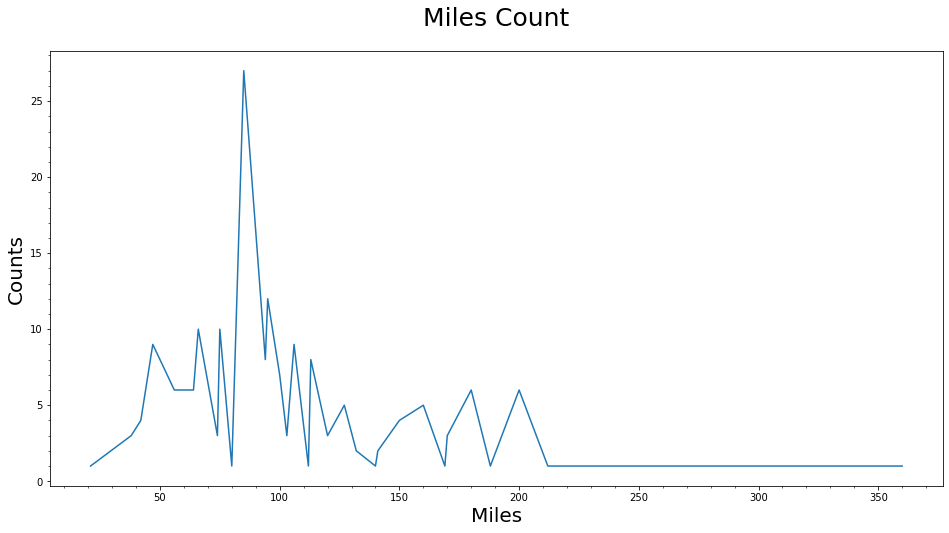

In [62]:
plt.figure(figsize=(16,8))
ax = sb.lineplot(x=aerofit['Miles'].value_counts().index,y=aerofit['Miles'].value_counts().values)
plt.minorticks_on()
plt.xlabel('Miles',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.title('Miles Count',fontsize=25,pad=25)
plt.show()

Comments:
1. From the above analysis, we can infer that, for the over all data, customers expectations for the number of miles they are going to use the treadmills for is peaking at 85 miles. We'll delve into individual product types later.

In [63]:
# Let's Once again get an idea of the structure of the Dataframe Aerofit.
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    category
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(5), int64(4)
memory usage: 7.4 KB


In [64]:
# Let's introduce a new column which shows the costing of each individual product type.
def assign_cost(x):
    if x['Product'] == 'KP281':
        return '$1500'
    elif x['Product'] == 'KP481':
        return '$1750'
    else:
        return '$2500'
aerofit['Cost'] = aerofit.apply(assign_cost,axis=1)

In [65]:
# Let's get the information of the New Dataframe with the newly introduced column.
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    category
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   Cost           180 non-null    object  
dtypes: category(5), int64(4), object(1)
memory usage: 8.8+ KB


In [66]:
# Let's Dissect the data according to different categories, starting with Product.
aerofit_KP281 = aerofit[aerofit['Product'] == 'KP281']
aerofit_KP481 = aerofit[aerofit['Product'] == 'KP481']
aerofit_KP781 = aerofit[aerofit['Product'] == 'KP781']
# Now Let's separate data on the basis of gender.
aerofit_KP281_Female = aerofit_KP281[aerofit_KP281['Gender'] == 'Female']
aerofit_KP281_Male = aerofit_KP281[aerofit_KP281['Gender'] == 'Male']
aerofit_KP481_Female = aerofit_KP481[aerofit_KP481['Gender'] == 'Female']
aerofit_KP481_Male = aerofit_KP481[aerofit_KP481['Gender'] == 'Male']
aerofit_KP781_Female = aerofit_KP781[aerofit_KP781['Gender'] == 'Female']
aerofit_KP781_Male = aerofit_KP781[aerofit_KP781['Gender'] == 'Male']
# Let's now separate each dataframe craeted above, on the basis of Marital Status.
aerofit_KP281_Female_MP = aerofit_KP281_Female[aerofit_KP281_Female['MaritalStatus'] == 'Partnered']
aerofit_KP281_Female_MS = aerofit_KP281_Female[aerofit_KP281_Female['MaritalStatus'] == 'Single']
aerofit_KP281_Male_MP = aerofit_KP281_Male[aerofit_KP281_Male['MaritalStatus'] == 'Partnered']
aerofit_KP281_Male_MS = aerofit_KP281_Male[aerofit_KP281_Male['MaritalStatus'] == 'Single']

aerofit_KP481_Female_MP = aerofit_KP481_Female[aerofit_KP481_Female['MaritalStatus'] == 'Partnered']
aerofit_KP481_Female_MS = aerofit_KP481_Female[aerofit_KP481_Female['MaritalStatus'] == 'Single']
aerofit_KP481_Male_MP = aerofit_KP481_Male[aerofit_KP481_Male['MaritalStatus'] == 'Partnered']
aerofit_KP481_Male_MS = aerofit_KP481_Male[aerofit_KP481_Male['MaritalStatus'] == 'Single']

aerofit_KP781_Female_MP = aerofit_KP781_Female[aerofit_KP781_Female['MaritalStatus'] == 'Partnered']
aerofit_KP781_Female_MS = aerofit_KP781_Female[aerofit_KP781_Female['MaritalStatus'] == 'Single']
aerofit_KP781_Male_MP = aerofit_KP781_Male[aerofit_KP781_Male['MaritalStatus'] == 'Partnered']
aerofit_KP781_Male_MS = aerofit_KP781_Male[aerofit_KP781_Male['MaritalStatus'] == 'Single']

In [67]:
# Let's Analyse for product KP281 in the female category and marital status partnered.
aerofit_KP281_Female_MP.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
2,KP281,19,Female,14,Partnered,4,3,30699,66,$1500
5,KP281,20,Female,14,Partnered,3,3,32973,66,$1500
6,KP281,21,Female,14,Partnered,3,3,35247,75,$1500
9,KP281,21,Female,15,Partnered,2,3,37521,85,$1500
11,KP281,22,Female,14,Partnered,3,2,35247,66,$1500


In [68]:
aerofit_KP281_Female_MP.shape

(27, 10)

In [69]:
# Probability of this category of buying KP281:
print(f'{100*(aerofit_KP281_Female_MP.shape[0]/aerofit.shape[0])}%')

15.0%


In [70]:
# Probability of this category of buying KP281 with KP281 data as sample space:
print(f'{100*(aerofit_KP281_Female_MP.shape[0]/aerofit_KP281.shape[0])}%')

33.75%


Comments:
1. We can see from Above, that out of 180, only 27 females have the preference for KP281 Product, that too from marital status partnered.
2. Also for the whole dataset Female Partnered stands at 15%, where as for within KP281 product type, the current category stands at 33.75%.

In [71]:
# Let's analyse the Age column for aerofit_KP281_Female_MP.
aerofit_KP281_Female_MP['Age'].describe()

count    27.000000
mean     28.333333
std       7.411011
min      19.000000
25%      24.500000
50%      27.000000
75%      29.000000
max      50.000000
Name: Age, dtype: float64

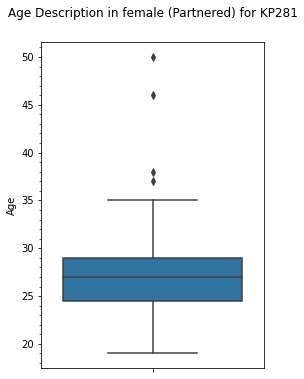

In [72]:
# Let's plot a boxplot graph of the current category and visualise the description, 
# and also see if there are any outliers.
plt.figure(figsize=(4,6))
sb.boxplot(data=aerofit_KP281_Female_MP,y='Age')
plt.title('Age Description in female (Partnered) for KP281', pad=25)
plt.minorticks_on()
plt.show()

In [73]:
# As we can see from above, there are a few outliers in teh age column, 
# let's see which are those
aerofit_KP281_Female_MP[aerofit_KP281_Female_MP['Age']>35]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
67,KP281,37,Female,16,Partnered,3,3,37521,85,$1500
69,KP281,38,Female,14,Partnered,2,3,54576,56,$1500
77,KP281,46,Female,16,Partnered,3,2,60261,47,$1500
79,KP281,50,Female,16,Partnered,3,3,64809,66,$1500


Comments:
1. As we can see from above, the mean age for aerofit_KP281_Female_MP category is 28.3 years.
2. The minimum age is 19 years and maximum is 50 years.
3. 25th percentile is 24.5 years,75th percentile is 29 years and the median is 27 years.
4. Standard Deviation is 7.4 years, depicting inconsistency of data, also Mean and Median vary, which depicts the non robustness of the data.
5. We can see from above, that, Ages 37, 38, 46 and 50 in the category aerofit_KP281_Female_MP are legitimate outliers.

In [74]:
# Let's now analyse the Dataframe with Gender Female, in KP281 product category,
# but marital status as Single.
aerofit_KP281_Female_MS.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
12,KP281,22,Female,16,Single,4,3,36384,75,$1500
13,KP281,22,Female,14,Single,3,3,35247,75,$1500
16,KP281,23,Female,14,Single,2,3,34110,103,$1500
18,KP281,23,Female,16,Single,4,3,38658,113,$1500
22,KP281,24,Female,16,Single,4,3,42069,94,$1500


In [75]:
aerofit_KP281_Female_MS.shape

(13, 10)

In [76]:
# Probability of this category of buying KP281:
print(f'{100*(aerofit_KP281_Female_MS.shape[0]/aerofit.shape[0])}%')

7.222222222222221%


In [77]:
# Probability of this category of buying KP281 with KP281 data as sample space:
print(f'{100*(aerofit_KP281_Female_MS.shape[0]/aerofit_KP281.shape[0])}%')

16.25%


Comments:
1. It is prominent from above that, the customers belonging to aerofit_KP281_Female_MS category are not great in strength, ie, just merely 13 in number, out of 180, also for the whole dataset Female Single stands at 7.2%, where as for within KP281 product type, the current category stands at 16.25%.

In [78]:
# Let's analyse the Age column for aerofit_KP281_Female_MS.
aerofit_KP281_Female_MS['Age'].describe()

count    13.000000
mean     28.692308
std       6.725382
min      22.000000
25%      23.000000
50%      26.000000
75%      33.000000
max      44.000000
Name: Age, dtype: float64

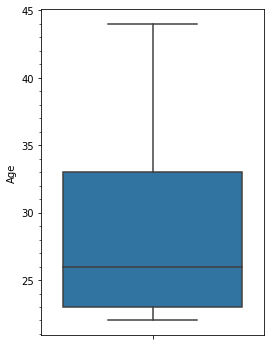

In [79]:
# Let's plot a boxplot graph of the current category and visualise the description, 
# and also see if there are any outliers.
plt.figure(figsize=(4,6))
sb.boxplot(data=aerofit_KP281_Female_MS,y='Age')
plt.minorticks_on()
plt.show()

Comments:
1. As we can see from above, the mean age for aerofit_KP281_Female_MS category is 28.7 years.
2. The minimum age is 22 years and maximum is 44 years.
3. 25th percentile is 23 years,75th percentile is 33 years and the median is 26 years.
4. Standard Deviation is 6.7 years, depicting inconsistency of data, also Mean and Median vary, which depicts the non robustness of the data.
5. We can see from above, that, in the category aerofit_KP281_Female_MP, there are no legitimate outliers.

In [80]:
# Let's visualy compare the two categories now.
aerofit_KP281_Female.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
2,KP281,19,Female,14,Partnered,4,3,30699,66,$1500
5,KP281,20,Female,14,Partnered,3,3,32973,66,$1500
6,KP281,21,Female,14,Partnered,3,3,35247,75,$1500
9,KP281,21,Female,15,Partnered,2,3,37521,85,$1500
11,KP281,22,Female,14,Partnered,3,2,35247,66,$1500


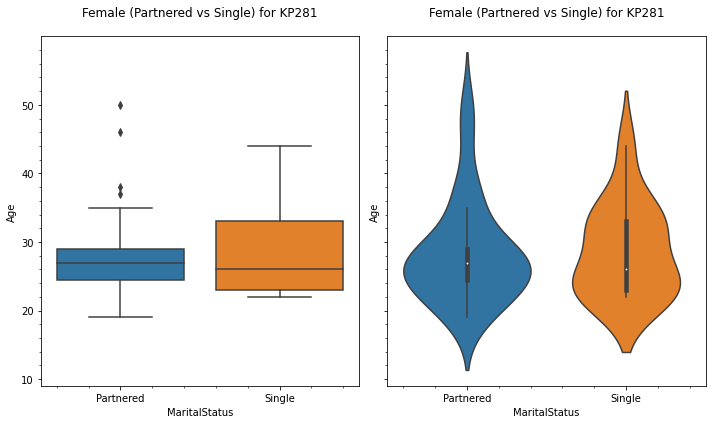

In [81]:
fig,ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,6))

plt.subplot(1,2,1)
sb.boxplot(data=aerofit_KP281_Female,y='Age',x='MaritalStatus')
plt.title('Female (Partnered vs Single) for KP281',pad=20)
plt.minorticks_on()

plt.subplot(1,2,2)
# plt.figure(figsize=(4,6))
sb.violinplot(data=aerofit_KP281_Female,y='Age',x='MaritalStatus')
plt.minorticks_on()
plt.title('Female (Partnered vs Single) for KP281',pad=20)

plt.tight_layout()
plt.show()

Comments:
1. From above comparison we can infer that, the violin plot depicts the density of Partnered Female for KP281 is more than density of Single Female in KP281 category.
2. Also if we are talking about individual catgeries, In Single female category, the ages 22 to 44 can be targeted, where for Partnered female catgeory, ages 19 to 35 can be targeted.

In [82]:
# Let's now analyse the aeraerofit_KP281_Male_MP category.
aerofit_KP281_Male_MP.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
4,KP281,20,Male,13,Partnered,4,2,35247,47,$1500
14,KP281,23,Male,16,Partnered,3,1,38658,47,$1500
15,KP281,23,Male,16,Partnered,3,3,40932,75,$1500
17,KP281,23,Male,16,Partnered,4,3,39795,94,$1500
25,KP281,24,Male,13,Partnered,3,2,42069,47,$1500


In [83]:
aerofit_KP281_Male_MP.shape

(21, 10)

In [84]:
# Probability of this category of buying KP281:
print(f'{100*(aerofit_KP281_Male_MP.shape[0]/aerofit.shape[0])}%')

11.666666666666666%


In [85]:
# Probability of this category of buying KP281 with KP281 data as sample space:
print(f'{100*(aerofit_KP281_Male_MP.shape[0]/aerofit_KP281.shape[0])}%')

26.25%


Comments:
1. It is prominent from above that, the customers belonging to aerofit_KP281_Male_MP category are also not great in strength, ie, just merely 21 in number, out of 180, amounting to a probability of 11.6% for Treadmill KP281 being bought by this category, where as for within KP281 product type, the current category stands at 26.25%.

In [86]:
# Let's analyse the Age column for aerofit_KP281_Male_MP.
aerofit_KP281_Male_MP['Age'].describe()

count    21.000000
mean     31.380952
std       7.857965
min      20.000000
25%      25.000000
50%      30.000000
75%      38.000000
max      47.000000
Name: Age, dtype: float64

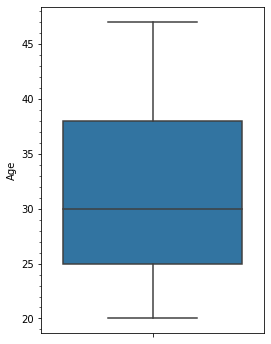

In [87]:
# Let's plot a boxplot graph of the current category and visualise the description, 
# and also see if there are any outliers.
plt.figure(figsize=(4,6))
sb.boxplot(data=aerofit_KP281_Male_MP,y='Age')
plt.minorticks_on()
plt.show()

Comments:
1. As we can see from above, the mean age for aerofit_KP281_Male_MP category is 31.4 years.
2. The minimum age is 20 years and maximum is 47 years.
3. 25th percentile is 25 years,75th percentile is 38 years and the median is 30 years.
4. Standard Deviation is 7.8 years, depicting inconsistency of data, also Mean and Median vary, which depicts the non robustness of the data.
5. We can see from above, that, in the category aerofit_KP281_Male_MP, there are no legitimate outliers.

In [88]:
# Let's now analyse the aeraerofit_KP281_Male_MS category.
aerofit_KP281_Male_MS.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
0,KP281,18,Male,14,Single,3,4,29562,112,$1500
1,KP281,19,Male,15,Single,2,3,31836,75,$1500
3,KP281,19,Male,12,Single,3,3,32973,85,$1500
7,KP281,21,Male,13,Single,3,3,32973,85,$1500
8,KP281,21,Male,15,Single,5,4,35247,141,$1500


In [89]:
aerofit_KP281_Male_MS.shape

(19, 10)

In [90]:
# Probability of this category of buying KP281:
print(f'{100*(aerofit_KP281_Male_MS.shape[0]/aerofit.shape[0])}%')

10.555555555555555%


In [91]:
# Probability of this category of buying KP281 with KP281 data as sample space:
print(f'{100*(aerofit_KP281_Male_MS.shape[0]/aerofit_KP281.shape[0])}%')

23.75%


Comments:
1. It is prominent from above that, the customers belonging to aerofit_KP281_Male_MS category are also not great in strength, ie, just merely 19 in number, out of 180, amounting to a probability of 10.56% for Treadmill KP281 being bought by this category,  where as for within KP281 product type, the current category stands at 23.75%

In [92]:
# Let's analyse the Age column for aerofit_KP281_Male_MS.
aerofit_KP281_Male_MS['Age'].describe()

count    19.000000
mean     25.631579
std       5.688297
min      18.000000
25%      21.500000
50%      25.000000
75%      28.000000
max      38.000000
Name: Age, dtype: float64

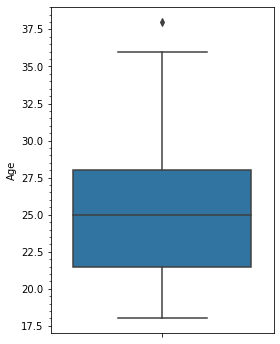

In [93]:
# Let's plot a boxplot graph of the current category and visualise the description, 
# and also see if there are any outliers.
plt.figure(figsize=(4,6))
sb.boxplot(data=aerofit_KP281_Male_MS,y='Age')
plt.minorticks_on()
plt.show()

In [94]:
# As we can see from above, there are a few outliers in the age column, 
# let's see which are those
aerofit_KP281_Male_MS[aerofit_KP281_Male_MS['Age']>36]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
70,KP281,38,Male,14,Single,2,3,52302,56,$1500


Comments:
1. As we can see from above, the mean age for aerofit_KP281_Male_MS category is 25.6 years.
2. The minimum age is 18 years and maximum is 38 years.
3. 25th percentile is 21.5 years,75th percentile is 28 years and the median is 25 years.
4. Standard Deviation is 5.6 years, which is comparatively lesser, depicting better consistency of data, also Mean and Median vary very little, which depicts the somewhat robustness of the data.
5. We can also see from above, that, in the category aerofit_KP281_Male_MS, there is one legitimate outlier, ie Age 38.

In [95]:
# Let's visualy compare the two categories now.
aerofit_KP281_Male.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
0,KP281,18,Male,14,Single,3,4,29562,112,$1500
1,KP281,19,Male,15,Single,2,3,31836,75,$1500
3,KP281,19,Male,12,Single,3,3,32973,85,$1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,$1500
7,KP281,21,Male,13,Single,3,3,32973,85,$1500


In [96]:
aerofit_KP281_Male.shape

(40, 10)

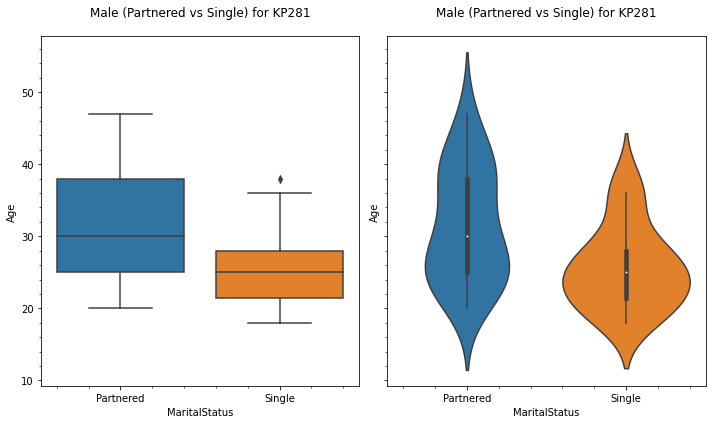

In [97]:
fig,ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,6))

plt.subplot(1,2,1)
sb.boxplot(data=aerofit_KP281_Male,y='Age',x='MaritalStatus')
plt.title('Male (Partnered vs Single) for KP281',pad=20)
plt.minorticks_on()

plt.subplot(1,2,2)
# plt.figure(figsize=(4,6))
sb.violinplot(data=aerofit_KP281_Male,y='Age',x='MaritalStatus')
plt.minorticks_on()
plt.title('Male (Partnered vs Single) for KP281',pad=20)

plt.tight_layout()
plt.show()

Comments:
1. From above comparison we can infer that, the violin plot depicts the density of Partnered Male for KP281 is more than density of Single Male in KP281 category, although by miniscule margin.
2. Also if we are talking about individual catgeries, In Single Male category, the ages 18 to 38 can be targeted, where as for Partnered female catgeory, ages 20 to 47 can be targeted.

In [98]:
# Let's now compare all the above categories together in Product type KP281 for Age factor.
aerofit_KP281.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
0,KP281,18,Male,14,Single,3,4,29562,112,$1500
1,KP281,19,Male,15,Single,2,3,31836,75,$1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,$1500
3,KP281,19,Male,12,Single,3,3,32973,85,$1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,$1500


In [99]:
aerofit_KP281.shape

(80, 10)

In [100]:
pd.crosstab(aerofit_KP281['Gender'],aerofit_KP281['MaritalStatus'],margins=True,margins_name='Total')

MaritalStatus,Partnered,Single,Total
Gender,,,
Female,27,13,40
Male,21,19,40
Total,48,32,80


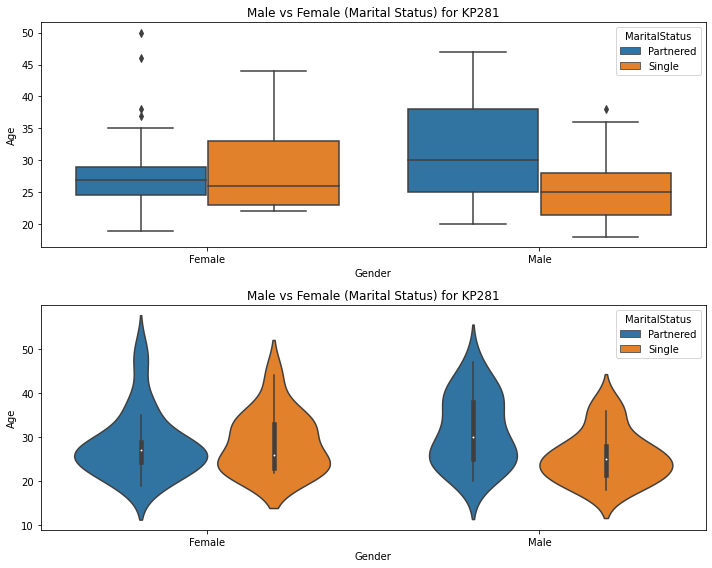

In [101]:
fig, ax = plt.subplots(2,1,figsize=(10,8))
plt.subplot(2,1,1)
sb.boxplot(data=aerofit_KP281,x='Gender',y='Age',hue='MaritalStatus')
plt.title('Male vs Female (Marital Status) for KP281')

plt.subplot(2,1,2)
sb.violinplot(data=aerofit_KP281,x='Gender',y='Age',hue='MaritalStatus')
plt.title('Male vs Female (Marital Status) for KP281')
plt.tight_layout()
plt.show()

Comments:
1. Among all the categories in Product KP281, when concerned with age, Male Partnered is the most favousrable cutomer base.
2. The favourable age to target is 24 to 36.

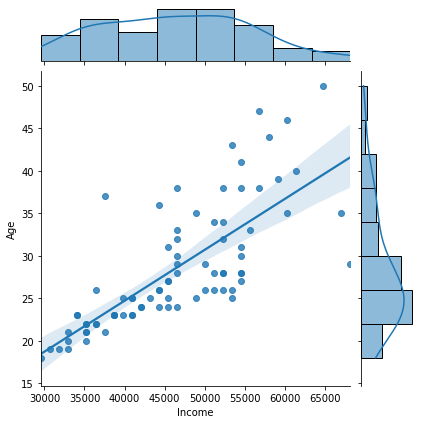

In [102]:
# Let's establish a relation between age and income and see,
# if the relation is positive or negative.
sb.jointplot(x=aerofit_KP281['Income'],y=aerofit_KP281['Age'],kind='reg')

Comments:
1. As we can see from above, there's a strong positive relation between Age and income and hence, high age may lead to higher buying capacity.
2. Let's see, what's the behavior of INCOME in the product type KP281 in various categories.

In [103]:
# Let's start with aerofit_KP281_Female_MP category.
# Let's analyse the income distribution of this category
aerofit_KP281_Female_MP['Income'].describe()

count       27.000000
mean     46153.777778
std       8954.186714
min      30699.000000
25%      38658.000000
50%      46617.000000
75%      52302.000000
max      64809.000000
Name: Income, dtype: float64

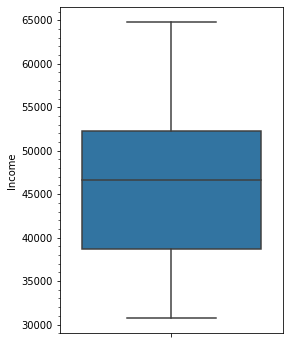

In [104]:
plt.figure(figsize=(4,6))
sb.boxplot(data=aerofit_KP281_Female_MP,y='Income')
plt.minorticks_on()
plt.show()

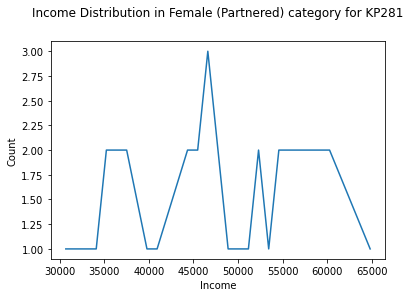

In [105]:
# Let's also visualise if there's any correlation between higher income and more buyings.
sb.lineplot(x=aerofit_KP281_Female_MP['Income'].value_counts().index,y=aerofit_KP281_Female_MP['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution in Female (Partnered) category for KP281',pad=25)
plt.show()

Comments:
1. As we can see from above, the mean income for aerofit_KP281_Female_MP category is 46153.7 USD.
2. The minimum Income is 30699 USD and maximum is 64809 USD.
3. 25th percentile is 38658 USD,75th percentile is 52302 USD and the median is 46617 USD.
4. Standard Deviation is 8954.18 USD, depicting inconsistency of data, also Mean and Median vary very little, which depicts the somewhat robustness of the data.
5. We can also see from above, that, in the category aerofit_KP281_Female_MP, there are no legitimate outliers.
6. The Line plot also depicts, that with increase in income, there's no substantial increase in buying potential of customers, in fact, customers with Incomes nearing the mean income, ie, 46153.7 are the one who prefer buying the product KP281.

In [106]:
# Let's continue with aerofit_KP281_Female_MS category.
# Let's analyse the income distribution of this category
aerofit_KP281_Female_MS['Income'].describe()

count       13.000000
mean     45742.384615
std      10139.441968
min      34110.000000
25%      36384.000000
50%      45480.000000
75%      52302.000000
max      67083.000000
Name: Income, dtype: float64

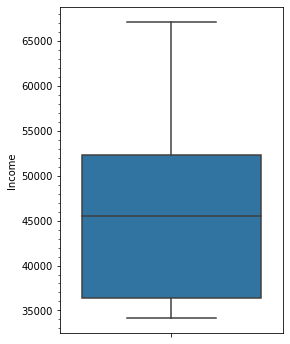

In [107]:
plt.figure(figsize=(4,6))
sb.boxplot(data=aerofit_KP281_Female_MS,y='Income')
plt.minorticks_on()
plt.show()

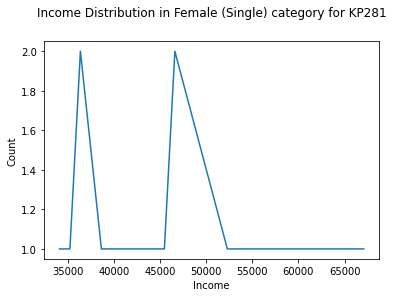

In [108]:
# Let's also visualise if there's any correlation between higher income and more buyings.
sb.lineplot(x=aerofit_KP281_Female_MS['Income'].value_counts().index,y=aerofit_KP281_Female_MS['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution in Female (Single) category for KP281',pad=25)
plt.show()

Comments:
1. As we can see from above, the mean income for aerofit_KP281_Female_MS category is 45742.3 USD.
2. The minimum Income is 34110 USD and maximum is 67083 USD.
3. 25th percentile is 36384 USD,75th percentile is 52302 USD and the median is 45480 USD.
4. Standard Deviation is 8954.18 USD, depicting inconsistency of data, also Mean and Median vary very little, which depicts the somewhat robustness of the data.
5. We can also see from above, that, in the category aerofit_KP281_Female_MS, there are no legitimate outliers.
6. The Line plot also depicts, that with increase in income, there's no substantial increase in buying potential of customers, in fact, customers with Incomes nearing the mean income, ie, 45742.3 are the one who prefer buying the product KP281, apart from that, customers with income bracket of 35k -38k also are potential customers.

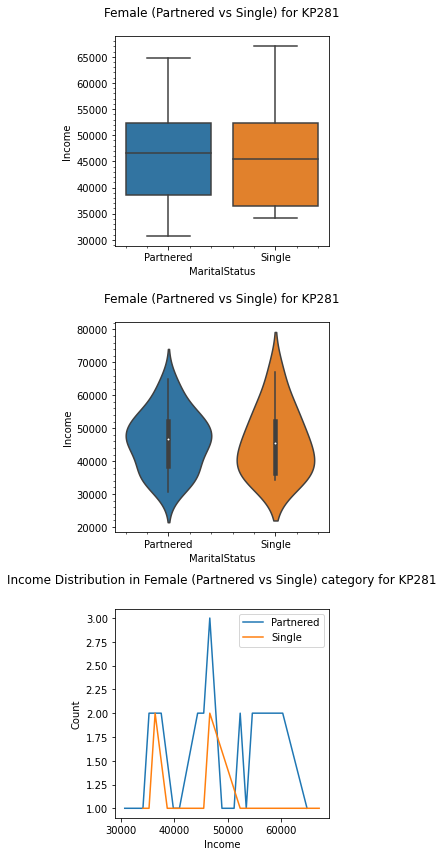

In [220]:
# Let's now compare the incomes of both these categories.
fig, ax = plt.subplots(3,1,figsize=(4,12))
plt.subplot(3,1,1)
sb.boxplot(data=aerofit_KP281_Female,y='Income',x='MaritalStatus')
plt.title('Female (Partnered vs Single) for KP281',pad=20)
plt.minorticks_on()

plt.subplot(3,1,2)
sb.violinplot(data=aerofit_KP281_Female,y='Income',x='MaritalStatus')
plt.minorticks_on()
plt.title('Female (Partnered vs Single) for KP281',pad=20)

plt.subplot(3,1,3)
sb.lineplot(x=aerofit_KP281_Female_MP['Income'].value_counts().index,y=aerofit_KP281_Female_MP['Income'].value_counts().values)
sb.lineplot(x=aerofit_KP281_Female_MS['Income'].value_counts().index,y=aerofit_KP281_Female_MS['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution in Female (Partnered vs Single) category for KP281',pad=25)
plt.legend(labels=['Partnered','Single'])

plt.tight_layout()
plt.show()

Comments:
1. From the above distributions, it can be observed that, the range of income amongst females customers in both, partnered and Single, is almost same, although the median in Single category is lower.
2. Female partnered category is more dense and hence depicting a wider customer base.
3. Line Chart distribution graph depicts that, for both the categories, income range of 45k - 50k and 34k - 40k have the most potential for buying the product.

In [110]:
# Let's Continue with aerofit_KP281_Male_MP category.
# Let's analyse the income distribution of this category
aerofit_KP281_Male_MP['Income'].describe()

count       21.00000
mean     50028.00000
std       8316.43803
min      35247.00000
25%      44343.00000
50%      51165.00000
75%      54576.00000
max      68220.00000
Name: Income, dtype: float64

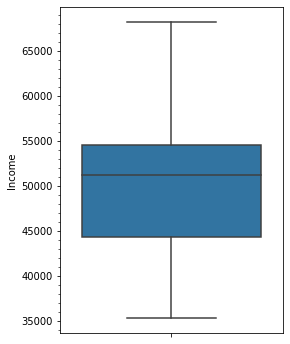

In [111]:
plt.figure(figsize=(4,6))
sb.boxplot(data=aerofit_KP281_Male_MP,y='Income')
plt.minorticks_on()
plt.show()

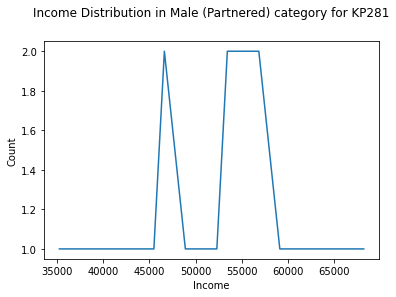

In [112]:
# Let's also visualise if there's any correlation between higher income and more buyings.
sb.lineplot(x=aerofit_KP281_Male_MP['Income'].value_counts().index,y=aerofit_KP281_Male_MP['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution in Male (Partnered) category for KP281',pad=25)
plt.show()

Comments:
1. As we can see from above, the mean income for aerofit_KP281_Male_MP category is 50028 USD.
2. The minimum Income is 35247 USD and maximum is 68220 USD.
3. 25th percentile is 44343 USD,75th percentile is 54576 USD and the median is 51165 USD.
4. Standard Deviation is 8316.4 USD, depicting inconsistency of data, also Mean and Median vary a little, which depicts the somewhat robustness of the data.
5. We can also see from above, that, in the category aerofit_KP281_Male_MS, there are no legitimate outliers.
6. The Line plot also depicts, that with increase in income, there's no substantial increase in buying potential of customers, in fact, customers with Incomes nearing the range 52k - 59k, and  46k - 48k are the one who prefer buying the product KP281 and also are potential customers.

In [113]:
# Let's Continue with aerofit_KP281_Male_MS category.
# Let's analyse the income distribution of this category
aerofit_KP281_Male_MS['Income'].describe()

count       19.000000
mean     43265.842105
std       8613.175748
min      29562.000000
25%      35815.500000
50%      43206.000000
75%      51733.500000
max      54576.000000
Name: Income, dtype: float64

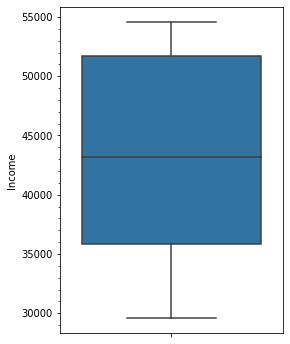

In [114]:
plt.figure(figsize=(4,6))
sb.boxplot(data=aerofit_KP281_Male_MS,y='Income')
plt.minorticks_on()
plt.show()

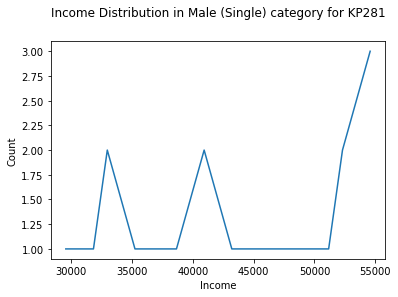

In [115]:
# Let's also visualise if there's any correlation between higher income and more buyings.
sb.lineplot(x=aerofit_KP281_Male_MS['Income'].value_counts().index,y=aerofit_KP281_Male_MS['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution in Male (Single) category for KP281',pad=25)
plt.show()

Comments:
1. As we can observe from above, the mean income for aerofit_KP281_Male_MS category is 43265 USD.
2. The minimum Income is 29562 USD and maximum is 54576 USD.
3. 25th percentile is 35815 USD,75th percentile is 51733 USD and the median is 43206 USD.
4. Standard Deviation is 8613.17 USD, depicting inconsistency of data, although Mean and Median are almost same, which depicts the somewhat robustness of the data.
5. We can also see from above, that, in the category aerofit_KP281_Male_MS, there are no legitimate outliers.
6. The Line plot also depicts, that with increase in income, there's no substantial increase in buying potential of customers, in fact, customers with Incomes nearing the range 52k - 54k, are the one who prefer buying the product KP281 and also are potential customers.

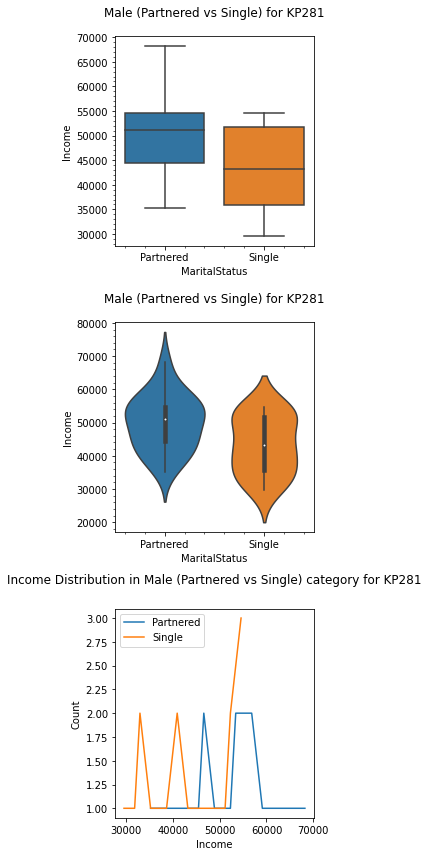

In [219]:
# Let's now compare the incomes of both these categories.
fig, ax = plt.subplots(3,1,figsize=(4,12))
plt.subplot(3,1,1)
sb.boxplot(data=aerofit_KP281_Male,y='Income',x='MaritalStatus')
plt.title('Male (Partnered vs Single) for KP281',pad=20)
plt.minorticks_on()

plt.subplot(3,1,2)
sb.violinplot(data=aerofit_KP281_Male,y='Income',x='MaritalStatus')
plt.minorticks_on()
plt.title('Male (Partnered vs Single) for KP281',pad=20)

plt.subplot(3,1,3)
p = sb.lineplot(x=aerofit_KP281_Male_MP['Income'].value_counts().index,y=aerofit_KP281_Male_MP['Income'].value_counts().values)
s = sb.lineplot(x=aerofit_KP281_Male_MS['Income'].value_counts().index,y=aerofit_KP281_Male_MS['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution in Male (Partnered vs Single) category for KP281',pad=25)
plt.legend(labels=['Partnered','Single'])

plt.tight_layout()
plt.show()

Comments:
1. From the above distributions, it can be observed that, the range of income amongst Male customers in Partnered category, is way higher than than Single customers, depicting stability and maturity in life.
2. Male partnered category is more dense and hence depicting a wider customer base.
3. Line Chart distribution graph depicts that, for Single category, income range of 55k - 58k has the most potential for buying the product, aprt fromt that, income ranges of 32k -35k and 38k - 43k for Single customers and 45k - 48k and 53k - 58k of partnered category have similar potential, but way lower than that of stated earlier. 

In [117]:
# Let's now compare all the above categories together in Product type KP281 for Age factor.
aerofit_KP281.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
0,KP281,18,Male,14,Single,3,4,29562,112,$1500
1,KP281,19,Male,15,Single,2,3,31836,75,$1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,$1500
3,KP281,19,Male,12,Single,3,3,32973,85,$1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,$1500


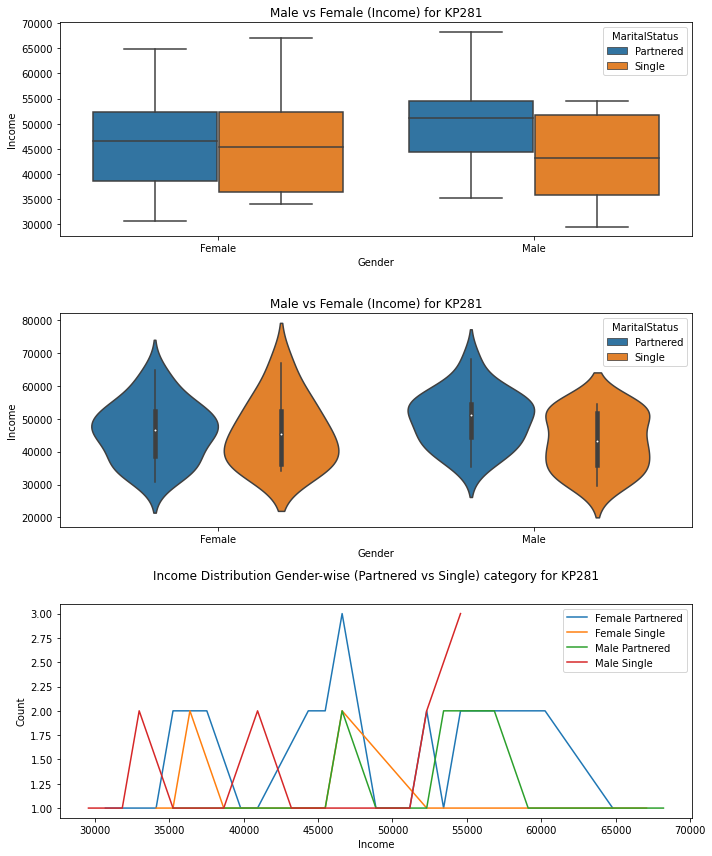

In [221]:
fig, ax = plt.subplots(3,1,figsize=(10,12))
plt.subplot(3,1,1)
sb.boxplot(data=aerofit_KP281,x='Gender',y='Income',hue='MaritalStatus')
plt.title('Male vs Female (Income) for KP281')

plt.subplot(3,1,2)
sb.violinplot(data=aerofit_KP281,x='Gender',y='Income',hue='MaritalStatus')
plt.title('Male vs Female (Income) for KP281')
plt.tight_layout()

plt.subplot(3,1,3)
sb.lineplot(x=aerofit_KP281_Female_MP['Income'].value_counts().index,y=aerofit_KP281_Female_MP['Income'].value_counts().values)
sb.lineplot(x=aerofit_KP281_Female_MS['Income'].value_counts().index,y=aerofit_KP281_Female_MS['Income'].value_counts().values)
p = sb.lineplot(x=aerofit_KP281_Male_MP['Income'].value_counts().index,y=aerofit_KP281_Male_MP['Income'].value_counts().values)
s = sb.lineplot(x=aerofit_KP281_Male_MS['Income'].value_counts().index,y=aerofit_KP281_Male_MS['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution Gender-wise (Partnered vs Single) category for KP281',pad=25)
plt.legend(labels=['Female Partnered','Female Single','Male Partnered','Male Single'])

plt.tight_layout()
plt.show()

Comments:
1. Among all the categories in Product KP281, when concerned with Income, Female Partnered and Male Single are the most favousrable cutomer base.
2. The favourable income bracket to target is USD 45k - 48k for Female partnered and USD 52k - 55k for Male single.

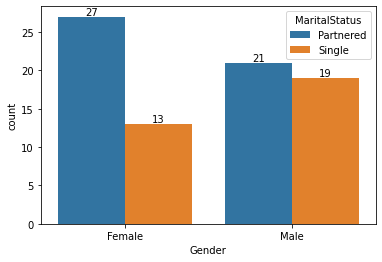

In [119]:
# Let's confirm our inference for KP281
ax = sb.countplot(data=aerofit_KP281,x='Gender',hue='MaritalStatus')
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.show()

Comments:
1. As we can seee from the above graph, Female Partner and Male Partner have a larger prominence over the data set for KP281. and hence our data is reaffirmed.

In [120]:
aerofit_KP281.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        80 non-null     category
 1   Age            80 non-null     int64   
 2   Gender         80 non-null     category
 3   Education      80 non-null     int64   
 4   MaritalStatus  80 non-null     category
 5   Usage          80 non-null     category
 6   Fitness        80 non-null     category
 7   Income         80 non-null     int64   
 8   Miles          80 non-null     int64   
 9   Cost           80 non-null     object  
dtypes: category(5), int64(4), object(1)
memory usage: 7.0+ KB


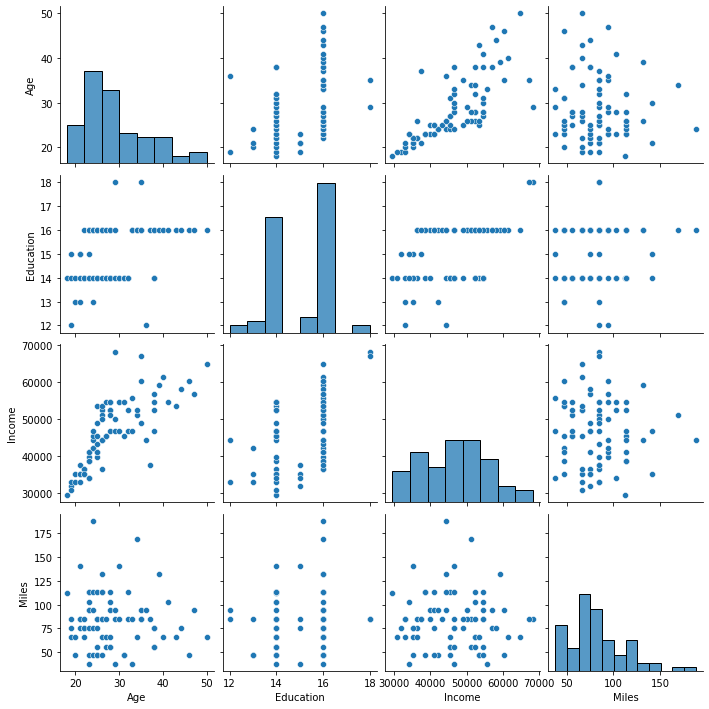

In [121]:
# Let's see if there are any prevailing relationships amongst different columns, 
# using a pairplot
sb.pairplot(data=aerofit_KP281)

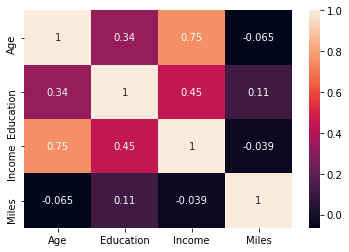

In [122]:
sb.heatmap(aerofit_KP281.corr(),annot=True)
plt.show()

Comments:
1. From the above Pairplot and heatmap, we can observe that, apart from a positive relationship between Age and income, which we have already established, there are no substantial relationships between any other columns.

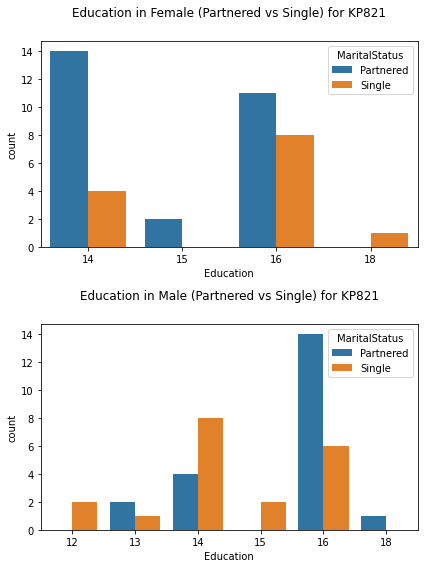

In [123]:
# Let's see in general, if other columns have any affect on buying of KP281.
# Let's start with Education column.
plt.subplots(2,1,figsize=(6,8))

plt.subplot(2,1,1)
sb.countplot(data=aerofit_KP281_Female,x='Education',hue='MaritalStatus')
plt.title('Education in Female (Partnered vs Single) for KP821',pad=25)

plt.subplot(2,1,2)
sb.countplot(data=aerofit_KP281_Male,x='Education',hue='MaritalStatus')
plt.title('Education in Male (Partnered vs Single) for KP821',pad=25)

plt.tight_layout()
plt.show()

Comments:
1. In the above graphical visualisation, it can be observed that, for Female customer base, Education till 14 years and 16 years, both in Partnered category is more prevailing.
2. Whereas in Male customer base, it can be observed that, 16 years of education in Partnered category is prevailing.

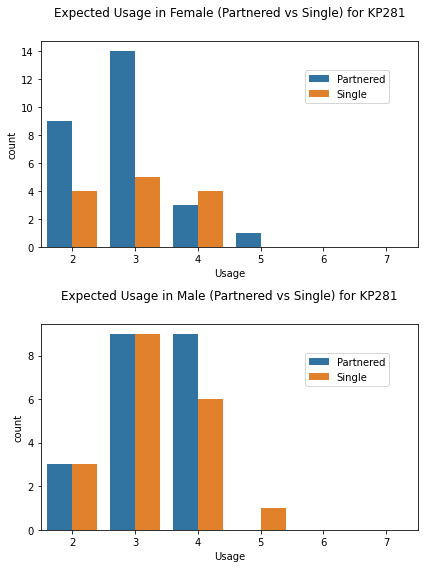

In [124]:
# Let's now analyse Usage column.
plt.subplots(2,1,figsize=(6,8))

plt.subplot(2,1,1)
sb.countplot(data=aerofit_KP281_Female,x='Usage',hue='MaritalStatus')
plt.title('Expected Usage in Female (Partnered vs Single) for KP281',pad=25)
plt.legend(loc=(0.7,0.7))

plt.subplot(2,1,2)
sb.countplot(data=aerofit_KP281_Male,x='Usage',hue='MaritalStatus')
plt.title('Expected Usage in Male (Partnered vs Single) for KP281',pad=25)
plt.legend(loc=(0.7,0.7))

plt.tight_layout()
plt.show()

Comments:
1. In the above graph it can be seen that, there's no concept of expected usage for 6 or 7 days, both in males and females user base.
2. In females, it can be observed that, in partnered category 2 to 3 days of expected usage is prominent.
3. In Males, though it is seen, partnered category prefers to use the treadmills for 3 to 4 days per week, majority of Single Males strata also plans to use it for 3 days.

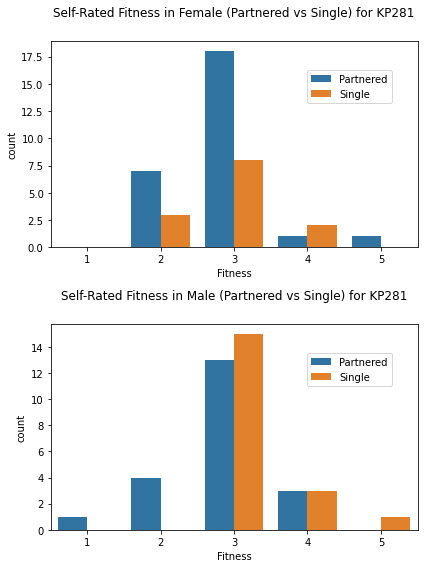

In [125]:
# Let's now analyse Fitness column for KP281
plt.subplots(2,1,figsize=(6,8))

plt.subplot(2,1,1)
sb.countplot(data=aerofit_KP281_Female,x='Fitness',hue='MaritalStatus')
plt.title('Self-Rated Fitness in Female (Partnered vs Single) for KP281',pad=25)
plt.legend(loc=(0.7,0.7))

plt.subplot(2,1,2)
sb.countplot(data=aerofit_KP281_Male,x='Fitness',hue='MaritalStatus')
plt.title('Self-Rated Fitness in Male (Partnered vs Single) for KP281',pad=25)
plt.legend(loc=(0.7,0.7))

plt.tight_layout()
plt.show()

Comments:
1. In Female partnered category, the rating 3 has been given with maximum frequency.
2. In Male Single category as well Partnered category, both have given themselves the rating 3.
3. In general majority buyer doesnt perceive itself as fit and hence buys the treadmill, to attain the stated fitness.

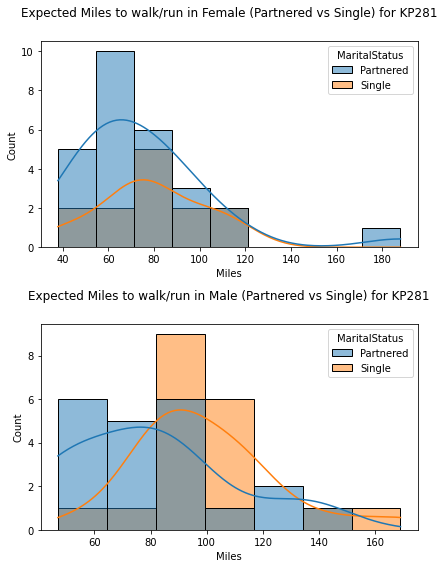

In [126]:
# Let's now analyse Miles column for KP281.
plt.subplots(2,1,figsize=(6,8))

plt.subplot(2,1,1)
sb.histplot(data=aerofit_KP281_Female,x='Miles',hue='MaritalStatus',kde=True)
plt.title('Expected Miles to walk/run in Female (Partnered vs Single) for KP281',pad=25)
# plt.legend(loc=(0.7,0.7))

plt.subplot(2,1,2)
sb.histplot(data=aerofit_KP281_Male,x='Miles',hue='MaritalStatus',kde=True)
plt.title('Expected Miles to walk/run in Male (Partnered vs Single) for KP281',pad=25)
# plt.legend(loc=(0.7,0.7))

plt.tight_layout()
plt.show()

Comments:
1. In the above graphical analysis, it can be infered that, for Female customer base, Partnered category mostly expects to walk/run 55-70 miles, where as in Single category, the expectation is 70-90 miles.
2. Further, it can be observed for male customer base, for partnered category, the expected miles are 62-80, where as for Single category it is 80-100.

In [127]:
# Let's Analyse for product KP481 in the female category and marital status partnered.
aerofit_KP481_Female_MP.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
82,KP481,20,Female,14,Partnered,3,3,34110,106,$1750
84,KP481,21,Female,14,Partnered,5,4,34110,212,$1750
91,KP481,23,Female,16,Partnered,3,2,43206,74,$1750
97,KP481,25,Female,14,Partnered,2,3,45480,85,$1750
100,KP481,25,Female,14,Partnered,5,3,47754,106,$1750


In [128]:
aerofit_KP481_Female_MP.shape

(15, 10)

In [129]:
# Probability of this category of buying KP481:
print(f'{100*(aerofit_KP481_Female_MP.shape[0]/aerofit.shape[0])}%')

8.333333333333332%


In [130]:
# Probability of this category of buying KP481 within KP481 product type as sample space:
print(f'{100*(aerofit_KP481_Female_MP.shape[0]/aerofit_KP481.shape[0])}%')

25.0%


Comments:
1. It is prominent from above that, the customers belonging to aerofit_KP481_Female_MS category are not great in strength, ie, just merely 15 in number, out of 180, amounting to a probability of 8.3% for Treadmill KP481 being bought by this category, and 25% when just concerned with KP481.

In [131]:
# Let's analyse the Age column for aerofit_KP481_Female_MS.
aerofit_KP481_Female_MP['Age'].describe()

count    15.000000
mean     30.000000
std       6.380775
min      20.000000
25%      25.000000
50%      31.000000
75%      34.500000
max      40.000000
Name: Age, dtype: float64

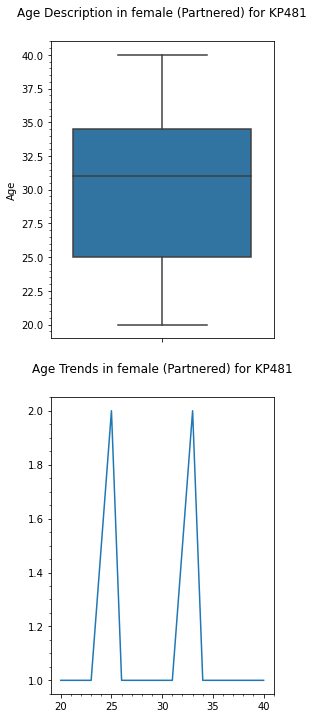

In [132]:
# Let's plot a boxplot graph of the current category and visualise the description, 
# and also see if there are any outliers.
fig,ax = plt.subplots(2,1,figsize=(4,12))

plt.subplot(2,1,1)
sb.boxplot(data=aerofit_KP481_Female_MP,y='Age')
plt.title('Age Description in female (Partnered) for KP481', pad=25)
plt.minorticks_on()

plt.subplot(2,1,2)
sb.lineplot(x=aerofit_KP481_Female_MP['Age'].value_counts().index,y=aerofit_KP481_Female_MP['Age'].value_counts().values)
plt.minorticks_on()
plt.title('Age Trends in female (Partnered) for KP481', pad=25)

plt.show()

Comments:
1. As we can see from above, the mean age for aerofit_KP481_Female_MP category is 30 years.
2. The minimum age is 20 years and maximum is 40 years.
3. 25th percentile is 25 years,75th percentile is 34.5 years and the median is 31 years.
4. Standard Deviation is 6.3 years, depicting somewhat consistency of data, also Mean and Median vary by little difference, which depicts the somewhat robustness of the data.
5. We can see from above, that, in the category aerofit_KP481_Female_MP, there are no legitimate outliers.
6. Also, majority of female partnered customers lie in the ranges - 23 - 26 and 31 - 34 years.

In [133]:
# Let's now analyse the Dataframe with Gender Female, in K4281 product category,
# but marital status as Single.
aerofit_KP481_Female_MS.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
89,KP481,23,Female,16,Single,3,3,45480,95,$1750
92,KP481,23,Female,14,Single,3,2,40932,53,$1750
94,KP481,24,Female,14,Single,3,2,40932,85,$1750
96,KP481,24,Female,16,Single,3,3,50028,106,$1750
98,KP481,25,Female,14,Single,3,4,43206,127,$1750


In [134]:
aerofit_KP481_Female_MS.shape

(14, 10)

In [135]:
# Probability of this category of buying KP481:
print(f'{100*(aerofit_KP481_Female_MS.shape[0]/aerofit.shape[0])}%')

7.777777777777778%


In [136]:
# Probability of this category of buying KP481 within KP481 product type as sample space:
print(f'{100*(aerofit_KP481_Female_MS.shape[0]/aerofit_KP481.shape[0])}%')

23.333333333333332%


Comments:
1. It is prominent from above that, the customers belonging to aerofit_KP481_Female_MS category are not great in strength, ie, just merely 14 in number, out of 180, amounting to a probability of 7.7% for Treadmill KP481 being bought by this category, and 23.3% when just concerned with KP481.

In [137]:
# Let's analyse the Age column for aerofit_KP481_Female_MS.
aerofit_KP481_Female_MS['Age'].describe()

count    14.000000
mean     28.142857
std       5.171775
min      23.000000
25%      24.250000
50%      25.500000
75%      30.750000
max      40.000000
Name: Age, dtype: float64

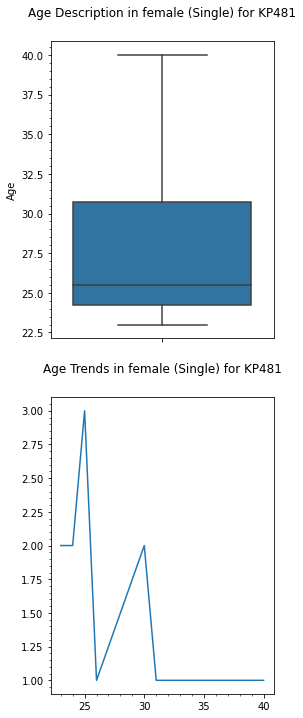

In [138]:
# Let's plot a boxplot graph of the current category and visualise the description, 
# and also see if there are any outliers.
fig,ax = plt.subplots(2,1,figsize=(4,12))

plt.subplot(2,1,1)
sb.boxplot(data=aerofit_KP481_Female_MS,y='Age')
plt.title('Age Description in female (Single) for KP481', pad=25)
plt.minorticks_on()

plt.subplot(2,1,2)
sb.lineplot(x=aerofit_KP481_Female_MS['Age'].value_counts().index,y=aerofit_KP481_Female_MS['Age'].value_counts().values)
plt.minorticks_on()
plt.title('Age Trends in female (Single) for KP481', pad=25)

plt.show()

Comments:
1. As we can see from above, the mean age for aerofit_KP481_Female_MS category is 28.7 years.
2. The minimum age is 23 years and maximum is 40 years.
3. 25th percentile is 24.25 years,75th percentile is 30.75 years and the median is 25.5 years.
4. Standard Deviation is 5.1 years, depicting somewhat consistency of data, but also Mean and Median vary by a considerable difference, which depicts the non robustness of the data.
5. We can see from above, that, in the category aerofit_KP481_Female_MP, there are no legitimate outliers.
6. Also, according to the line graph, majority of female single customers lie in the ranges - 23.5 - 26 and 26 - 31 years.

In [139]:
# Let's visualy compare the two categories now.
aerofit_KP481_Female.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
82,KP481,20,Female,14,Partnered,3,3,34110,106,$1750
84,KP481,21,Female,14,Partnered,5,4,34110,212,$1750
89,KP481,23,Female,16,Single,3,3,45480,95,$1750
91,KP481,23,Female,16,Partnered,3,2,43206,74,$1750
92,KP481,23,Female,14,Single,3,2,40932,53,$1750


<ipython-input-140-7fa8e104a338>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,2)


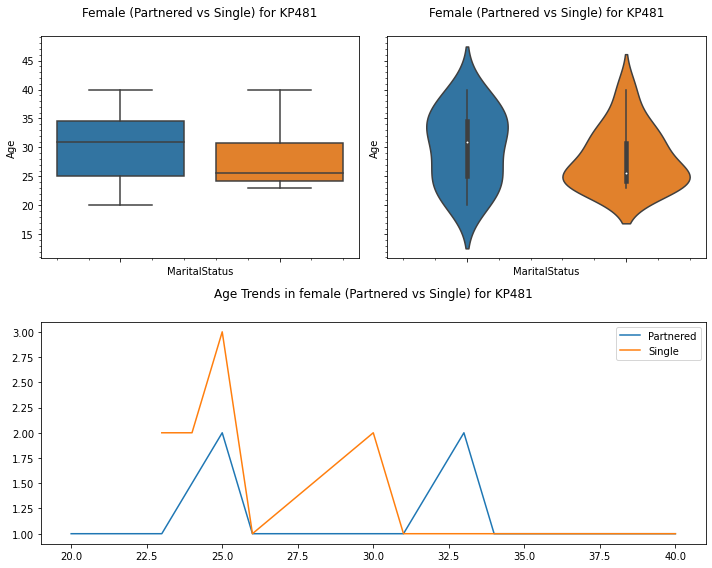

In [140]:
fig,ax = plt.subplots(2,2,sharex=True,sharey=True,figsize=(10,8))

plt.subplot(2,2,1)
sb.boxplot(data=aerofit_KP481_Female,y='Age',x='MaritalStatus')
plt.title('Female (Partnered vs Single) for KP481',pad=20)
plt.minorticks_on()

plt.subplot(2,2,2)
sb.violinplot(data=aerofit_KP481_Female,y='Age',x='MaritalStatus')
plt.minorticks_on()
plt.title('Female (Partnered vs Single) for KP481',pad=20)

plt.subplot(2,1,2)
sb.lineplot(x=aerofit_KP481_Female_MP['Age'].value_counts().index,y=aerofit_KP481_Female_MP['Age'].value_counts().values)
sb.lineplot(x=aerofit_KP481_Female_MS['Age'].value_counts().index,y=aerofit_KP481_Female_MS['Age'].value_counts().values)
plt.title('Age Trends in female (Partnered vs Single) for KP481', pad=25)
plt.legend(labels=['Partnered','Single'])

plt.tight_layout()
plt.show()

Comments:
1. From above comparison we can infer that, the violin plot depicts the density of Partnered Female for KP481 is more than density of Single Female in KP481 category.
2. Also if we are talking about individual catgeries, over all, Single female category in the age range of 23-26 is prevailing.

In [141]:
# Let's now analyse the aeraerofit_KP481_Male_MP category.
aerofit_KP481_Male_MP.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
85,KP481,21,Male,16,Partnered,2,2,34110,42,$1750
86,KP481,21,Male,12,Partnered,2,2,32973,53,$1750
87,KP481,23,Male,14,Partnered,3,3,36384,95,$1750
88,KP481,23,Male,14,Partnered,3,3,38658,85,$1750
90,KP481,23,Male,16,Partnered,4,3,45480,127,$1750


In [142]:
aerofit_KP481_Male_MP.shape

(21, 10)

In [143]:
# Probability of this category of buying KP481:
print(f'{100*(aerofit_KP481_Male_MP.shape[0]/aerofit.shape[0])}%')

11.666666666666666%


In [144]:
# Probability of this category of buying KP481 with KP481 product type as sample space:
print(f'{100*(aerofit_KP481_Male_MP.shape[0]/aerofit_KP481.shape[0])}%')

35.0%


Comments:
1. It is prominent from above that, the customers belonging to aerofit_KP481_Male_MP category are in somewhat substantial strength, ie, 21 in number, out of 180, amounting to a probability of 11.6% for Treadmill KP481 being bought by this category, and 35% within the category.

In [145]:
# Let's analyse the Age column for aerofit_KP481_Male_MP.
aerofit_KP481_Male_MP['Age'].describe()

count    21.000000
mean     30.380952
std       7.927649
min      21.000000
25%      23.000000
50%      31.000000
75%      35.000000
max      48.000000
Name: Age, dtype: float64

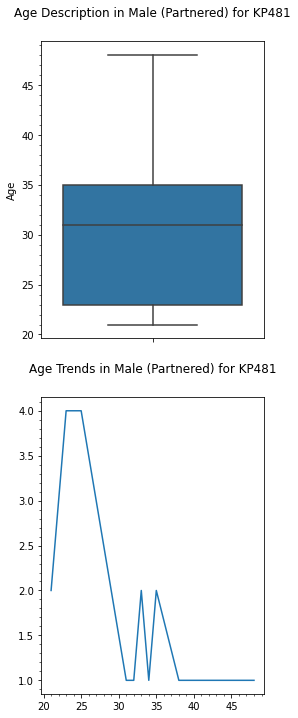

In [146]:
# Let's plot a boxplot graph of the current category and visualise the description, 
# and also see if there are any outliers.
fig,ax = plt.subplots(2,1,figsize=(4,12))

plt.subplot(2,1,1)
sb.boxplot(data=aerofit_KP481_Male_MP,y='Age')
plt.title('Age Description in Male (Partnered) for KP481', pad=25)
plt.minorticks_on()

plt.subplot(2,1,2)
sb.lineplot(x=aerofit_KP481_Male_MP['Age'].value_counts().index,y=aerofit_KP481_Male_MP['Age'].value_counts().values)
plt.minorticks_on()
plt.title('Age Trends in Male (Partnered) for KP481', pad=25)

plt.show()

Comments:
1. As we can see from above, the mean age for aerofit_KP481_Male_MP category is 30.9 years.
2. The minimum age is 21 years and maximum is 48 years.
3. 25th percentile is 23 years,75th percentile is 35 years and the median is 31 years.
4. Standard Deviation is 7.9 years, depicting inconsistency of data, also Mean and Median vary very little, which depicts the somewhat robustness of the data.
5. We can see from above, that, in the category aerofit_KP481_Male_MP, there are no legitimate outliers.
6. According to line graph, Age range of 21-31 has more prominance than the rest of data set.

In [147]:
# Let's now analyse the aeraerofit_KP481_Male_MS category.
aerofit_KP481_Male_MS.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
80,KP481,19,Male,14,Single,3,3,31836,64,$1750
81,KP481,20,Male,14,Single,2,3,32973,53,$1750
83,KP481,20,Male,14,Single,3,3,38658,95,$1750
95,KP481,24,Male,14,Single,3,4,48891,106,$1750
101,KP481,25,Male,14,Single,3,3,45480,95,$1750


In [148]:
aerofit_KP481_Male_MS.shape

(10, 10)

In [149]:
# Probability of this category of buying KP481:
print(f'{100*(aerofit_KP481_Male_MS.shape[0]/aerofit.shape[0])}%')

5.555555555555555%


In [150]:
# Probability of this category of buying KP481 within the category:
print(f'{100*(aerofit_KP481_Male_MS.shape[0]/aerofit_KP481.shape[0])}%')

16.666666666666664%


Comments:
1. It is prominent from above that, the customers belonging to aerofit_KP481_Male_MS category are very meagre strength, ie, just merely 10 in number, out of 180, amounting to a probability of 5.5% for Treadmill KP481 being bought by this category, and 16.6% within the category.

In [151]:
# Let's analyse the Age column for aerofit_KP481_Male_MS.
aerofit_KP481_Male_MS['Age'].describe()

count    10.000000
mean     25.200000
std       4.962078
min      19.000000
25%      21.000000
50%      25.000000
75%      26.750000
max      34.000000
Name: Age, dtype: float64

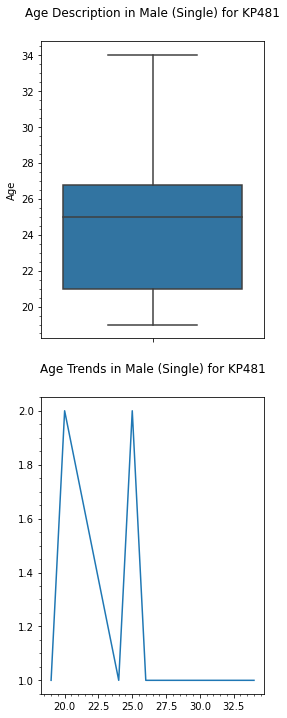

In [152]:
# Let's plot a boxplot graph of the current category and visualise the description, 
# and also see if there are any outliers.
fig,ax = plt.subplots(2,1,figsize=(4,12))

plt.subplot(2,1,1)
sb.boxplot(data=aerofit_KP481_Male_MS,y='Age')
plt.title('Age Description in Male (Single) for KP481', pad=25)
plt.minorticks_on()

plt.subplot(2,1,2)
sb.lineplot(x=aerofit_KP481_Male_MS['Age'].value_counts().index,y=aerofit_KP481_Male_MS['Age'].value_counts().values)
plt.minorticks_on()
plt.title('Age Trends in Male (Single) for KP481', pad=25)

plt.show()

Comments:
1. As we can see from above, the mean age for aerofit_KP481_Male_MS category is 25.2 years.
2. The minimum age is 19 years and maximum is 34 years.
3. 25th percentile is 21 years,75th percentile is 26.75 years and the median is 25 years.
4. Standard Deviation is 4.9 years, which is comparatively lesser, depicting better consistency of data, also Mean and Median vary very little, which depicts the somewhat robustness of the data, but the data set in itself is very small.
5. We can also see from above, that, in the category aerofit_KP481_Male_MS, there is no legitimate outlier.
6. Also, in accordance with the line graph, age ranges 19-24 and 24-26 have the most prominence.

In [153]:
# Let's visualy compare the two categories now.
aerofit_KP481_Male.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
80,KP481,19,Male,14,Single,3,3,31836,64,$1750
81,KP481,20,Male,14,Single,2,3,32973,53,$1750
83,KP481,20,Male,14,Single,3,3,38658,95,$1750
85,KP481,21,Male,16,Partnered,2,2,34110,42,$1750
86,KP481,21,Male,12,Partnered,2,2,32973,53,$1750


In [154]:
aerofit_KP481_Male.shape

(31, 10)

<ipython-input-155-0b0b25fd35ab>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,2)


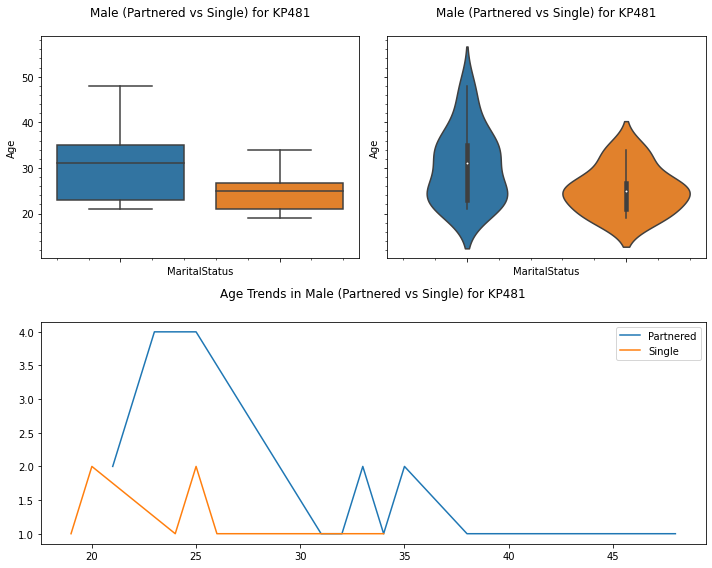

In [155]:
fig,ax = plt.subplots(2,2,sharex=True,sharey=True,figsize=(10,8))

plt.subplot(2,2,1)
sb.boxplot(data=aerofit_KP481_Male,y='Age',x='MaritalStatus')
plt.title('Male (Partnered vs Single) for KP481',pad=20)
plt.minorticks_on()

plt.subplot(2,2,2)
sb.violinplot(data=aerofit_KP481_Male,y='Age',x='MaritalStatus')
plt.minorticks_on()
plt.title('Male (Partnered vs Single) for KP481',pad=20)

plt.subplot(2,1,2)
sb.lineplot(x=aerofit_KP481_Male_MP['Age'].value_counts().index,y=aerofit_KP481_Male_MP['Age'].value_counts().values)
sb.lineplot(x=aerofit_KP481_Male_MS['Age'].value_counts().index,y=aerofit_KP481_Male_MS['Age'].value_counts().values)
plt.title('Age Trends in Male (Partnered vs Single) for KP481', pad=25)
plt.legend(labels=['Partnered','Single'])

plt.tight_layout()
plt.show()

Comments:
1. From above comparison we can infer that, the violin plot depicts the density of Partnered Male for KP481 is more than density of Single Male in KP481 category.
2. Also if we are talking about individual catgeries, over all, Partnered Male category in the age range of 21-21 is very strongly prevailing.

In [156]:
# Let's now compare all the above categories together in Product type KP481 for Age factor.
aerofit_KP481.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
80,KP481,19,Male,14,Single,3,3,31836,64,$1750
81,KP481,20,Male,14,Single,2,3,32973,53,$1750
82,KP481,20,Female,14,Partnered,3,3,34110,106,$1750
83,KP481,20,Male,14,Single,3,3,38658,95,$1750
84,KP481,21,Female,14,Partnered,5,4,34110,212,$1750


In [157]:
aerofit_KP481.shape

(60, 10)

In [158]:
pd.crosstab(aerofit_KP481['Gender'],aerofit_KP481['MaritalStatus'],margins=True,margins_name='Total')

MaritalStatus,Partnered,Single,Total
Gender,,,
Female,15,14,29
Male,21,10,31
Total,36,24,60


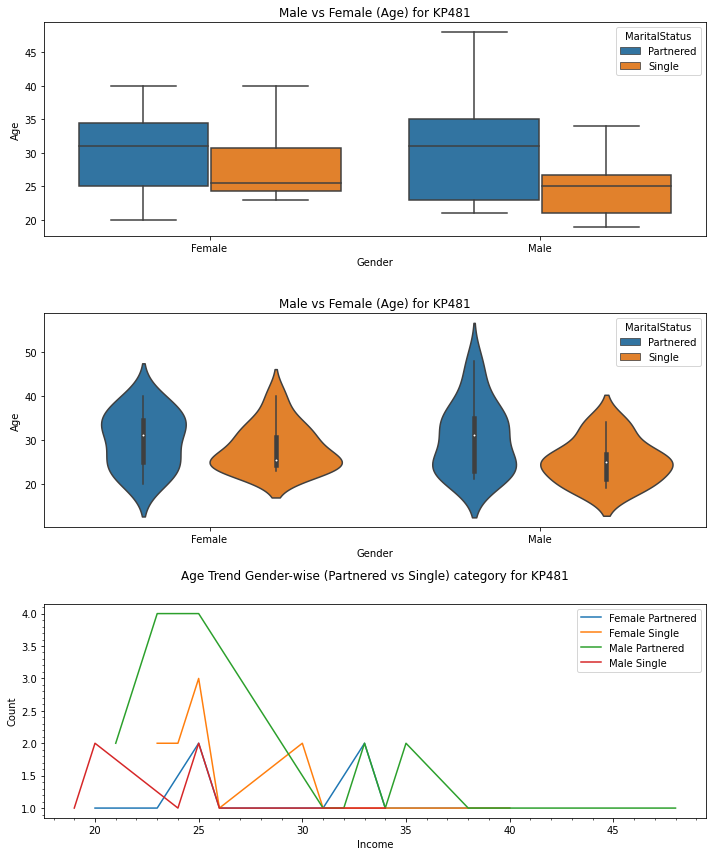

In [222]:
fig, ax = plt.subplots(3,1,figsize=(10,12))
plt.subplot(3,1,1)
sb.boxplot(data=aerofit_KP481,x='Gender',y='Age',hue='MaritalStatus')
plt.title('Male vs Female (Age) for KP481')

plt.subplot(3,1,2)
sb.violinplot(data=aerofit_KP481,x='Gender',y='Age',hue='MaritalStatus')
plt.title('Male vs Female (Age) for KP481')
# plt.tight_layout()

plt.subplot(3,1,3)
sb.lineplot(x=aerofit_KP481_Female_MP['Age'].value_counts().index,y=aerofit_KP481_Female_MP['Age'].value_counts().values)
sb.lineplot(x=aerofit_KP481_Female_MS['Age'].value_counts().index,y=aerofit_KP481_Female_MS['Age'].value_counts().values)
p = sb.lineplot(x=aerofit_KP481_Male_MP['Age'].value_counts().index,y=aerofit_KP481_Male_MP['Age'].value_counts().values)
s = sb.lineplot(x=aerofit_KP481_Male_MS['Age'].value_counts().index,y=aerofit_KP481_Male_MS['Age'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Age Trend Gender-wise (Partnered vs Single) category for KP481',pad=25)
plt.legend(labels=['Female Partnered','Female Single','Male Partnered','Male Single'])
plt.minorticks_on()

plt.tight_layout()
plt.show()

Comments:
1. Among all the categories in Product KP481, when concerned with Age, Male Partnered and Female Single are the most favousrable cutomer base.
2. The favourable Age bracket to target is 21-31 for Male partnered and 24-26 for Female single.

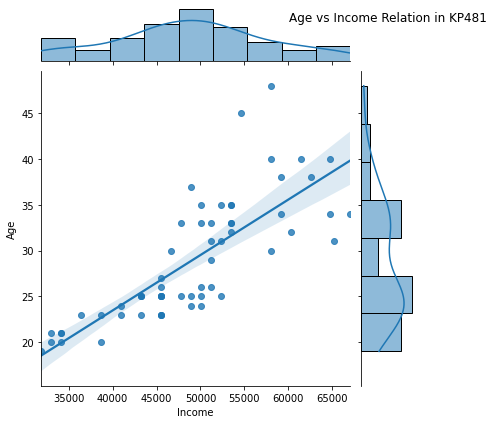

In [160]:
# Let's establish a relation between age and income and see,
# if the relation is positive or negative.
sb.jointplot(x=aerofit_KP481['Income'],y=aerofit_KP481['Age'],kind='reg')
plt.title('Age vs Income Relation in KP481', pad=50)
plt.show()

Comments:
1. As we can see from above, there's a strong positive relation between Age and income and hence, high age may lead to higher buying capacity.
2. Let's see, what's the behavior of INCOME in the product type KP481 in various categories.

In [161]:
# Let's start with aerofit_KP481_Female_MP category.
# Let's analyse the income distribution of this category
aerofit_KP481_Female_MP['Income'].describe()


count       15.000000
mean     49724.800000
std       8957.558964
min      34110.000000
25%      45480.000000
50%      50028.000000
75%      52870.500000
max      64809.000000
Name: Income, dtype: float64

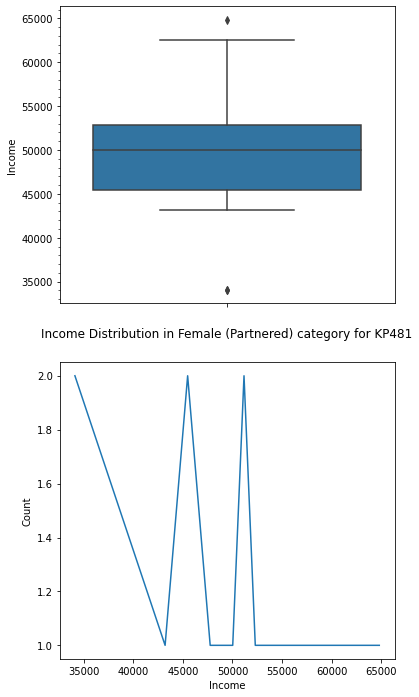

In [162]:
plt.subplots(2,1,figsize=(6,12))

plt.subplot(2,1,1)
sb.boxplot(data=aerofit_KP481_Female_MP,y='Income')
plt.minorticks_on()

# Let's also visualise if there's any correlation between higher income and more buyings.
plt.subplot(2,1,2)
sb.lineplot(x=aerofit_KP481_Female_MP['Income'].value_counts().index,y=aerofit_KP481_Female_MP['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution in Female (Partnered) category for KP481',pad=25)

plt.show()

In [163]:
# Let's detect the outlier values in the above visualisation.
aerofit_KP481_Female_MP[(aerofit_KP481_Female_MP['Income']>63000) | (aerofit_KP481_Female_MP['Income']<43000)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
82,KP481,20,Female,14,Partnered,3,3,34110,106,$1750
84,KP481,21,Female,14,Partnered,5,4,34110,212,$1750
125,KP481,34,Female,16,Partnered,4,3,64809,95,$1750


Comments:
1. As we can see from above, the mean income for aerofit_KP481_Female_MP category is 49724.8 USD.
2. The minimum Income is 34110 USD and maximum is 64809 USD.
3. 25th percentile is 45480 USD,75th percentile is 52870.5 USD and the median is 50028 USD.
4. Standard Deviation is 8957.5 USD, depicting inconsistency of data, also Mean and Median vary very little, which depicts the somewhat robustness of the data.
5. We can also see from above, that, in the category aerofit_KP481_Female_MP, there are few legitimate outliers, which have been demostrated.
6. The Line plot also depicts, that with increase in income, there's no substantial increase in buying potential of customers, in fact, customers with Incomes ranging from 43k-48k and 50k-53k are the ones who prefer buying the product KP481.

In [164]:
# Let's continue with aerofit_KP481_Female_MS category.
# Let's analyse the income distribution of this category
aerofit_KP481_Female_MS['Income'].describe()

count       14.000000
mean     48920.357143
std       7109.259472
min      40932.000000
25%      43774.500000
50%      47185.500000
75%      50028.000000
max      65220.000000
Name: Income, dtype: float64

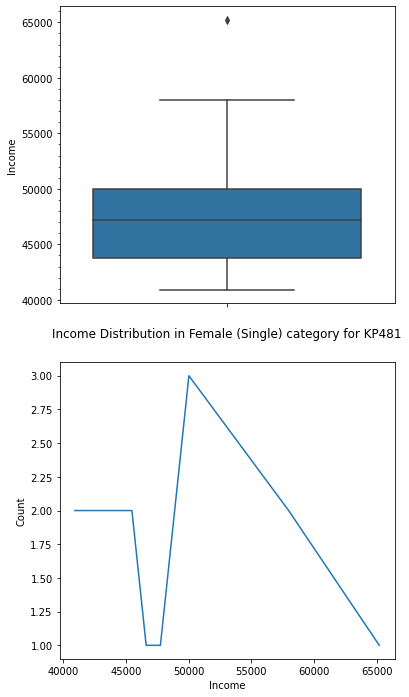

In [165]:
plt.subplots(2,1,figsize=(6,12))

plt.subplot(2,1,1)
sb.boxplot(data=aerofit_KP481_Female_MS,y='Income')
plt.minorticks_on()

# Let's also visualise if there's any correlation between higher income and more buyings.
plt.subplot(2,1,2)
sb.lineplot(x=aerofit_KP481_Female_MS['Income'].value_counts().index,y=aerofit_KP481_Female_MS['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution in Female (Single) category for KP481',pad=25)

plt.show()

In [166]:
# Let's detect the outlier values in the above visualisation.
aerofit_KP481_Female_MS[(aerofit_KP481_Female_MS['Income']>58000)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
117,KP481,31,Female,18,Single,2,1,65220,21,$1750


Comments:
1. As we can see from above, the mean income for aerofit_KP481_Female_MS category is 48920.3 USD.
2. The minimum Income is 34110 USD and maximum is 65220 USD.
3. 25th percentile is 43774.5 USD,75th percentile is 50028 USD and the median is 47185.5 USD.
4. Standard Deviation is 7109.25 USD, depicting inconsistency of data, also Mean and Median vary by considerable difference, which depicts the non robustness of the data.
5. We can also see from above, that, in the category aerofit_KP481_Female_MS, there are few legitimate outliers, which have been demostrated above.
6. The Line plot also depicts, that with increase in income, there's no substantial increase in buying potential of customers, in fact, customers with Incomes ranging from 48k-50k are the ones who prefer buying the product KP481.

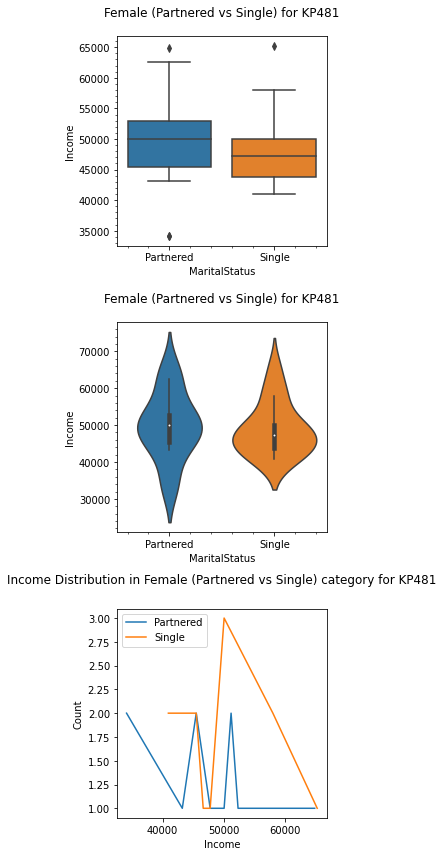

In [223]:
# Let's now compare the incomes of both these categories.
fig, ax = plt.subplots(3,1,figsize=(4,12))
plt.subplot(3,1,1)
sb.boxplot(data=aerofit_KP481_Female,y='Income',x='MaritalStatus')
plt.title('Female (Partnered vs Single) for KP481',pad=20)
plt.minorticks_on()

plt.subplot(3,1,2)
sb.violinplot(data=aerofit_KP481_Female,y='Income',x='MaritalStatus')
plt.minorticks_on()
plt.title('Female (Partnered vs Single) for KP481',pad=20)

plt.subplot(3,1,3)
sb.lineplot(x=aerofit_KP481_Female_MP['Income'].value_counts().index,y=aerofit_KP481_Female_MP['Income'].value_counts().values)
sb.lineplot(x=aerofit_KP481_Female_MS['Income'].value_counts().index,y=aerofit_KP481_Female_MS['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution in Female (Partnered vs Single) category for KP481',pad=25)
plt.legend(labels=['Partnered','Single'])

plt.tight_layout()
plt.show()

Comments:
1. From the above distributions, it can be observed that, the range of income amongst females customers in partnered category is higher, that the Single category, though the median in Single category is lower.
2. Female partnered category is more dense and hence depicting a wider customer base.
3. Line Chart distribution graph depicts that, for single category, income range of 48k - 50k and 43k - 48k for partnered category have the most potential for buying the product KP481.

In [168]:
# Let's Continue with aerofit_KP481_Male_MP category.
# Let's analyse the income distribution of this category
aerofit_KP481_Male_MP['Income'].describe()

count       21.000000
mean     49378.285714
std       8618.515714
min      32973.000000
25%      45480.000000
50%      52302.000000
75%      53439.000000
max      64809.000000
Name: Income, dtype: float64

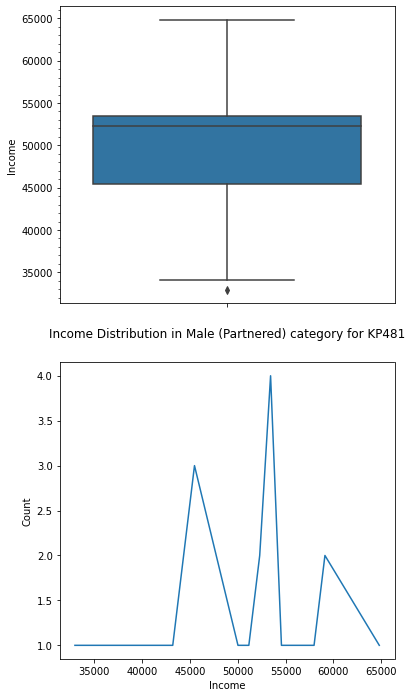

In [169]:
plt.subplots(2,1,figsize=(6,12))

plt.subplot(2,1,1)
sb.boxplot(data=aerofit_KP481_Male_MP,y='Income')
plt.minorticks_on()

# Let's also visualise if there's any correlation between higher income and more buyings.
plt.subplot(2,1,2)
sb.lineplot(x=aerofit_KP481_Male_MP['Income'].value_counts().index,y=aerofit_KP481_Male_MP['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution in Male (Partnered) category for KP481',pad=25)

plt.show()

In [170]:
# Let's detect the outlier values in the above visualisation.
aerofit_KP481_Male_MP[(aerofit_KP481_Male_MP['Income']<34000)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
86,KP481,21,Male,12,Partnered,2,2,32973,53,$1750


Comments:
1. As we can see from above, the mean income for aerofit_KP481_Male_MP category is 49378.2 USD.
2. The minimum Income is 32973 USD and maximum is 64809 USD.
3. 25th percentile is 45480 USD,75th percentile is 53439 USD and the median is 52302 USD.
4. Standard Deviation is 8618.5 USD, depicting inconsistency of data, also Mean and Median vary a lot, which depicts the non robustness of the data.
5. We can also see from above, that, in the category aerofit_KP481_Male_MP, there is one legitimate outlier, as demonstrated above.
6. The Line plot also depicts, that with increase in income, there's no substantial increase in buying potential of customers, in fact, customers with Incomes nearing the range 43k - 50k, and 51k - 54k are the ones who prefer buying the product KP481 and also are potential customers.

In [171]:
# Let's Continue with aerofit_KP481_Male_MS category.
# Let's analyse the income distribution of this category
aerofit_KP481_Male_MS['Income'].describe()

count       10.00000
mean     47071.80000
std      11078.21603
min      31836.00000
25%      40363.50000
50%      47185.50000
75%      50596.50000
max      67083.00000
Name: Income, dtype: float64

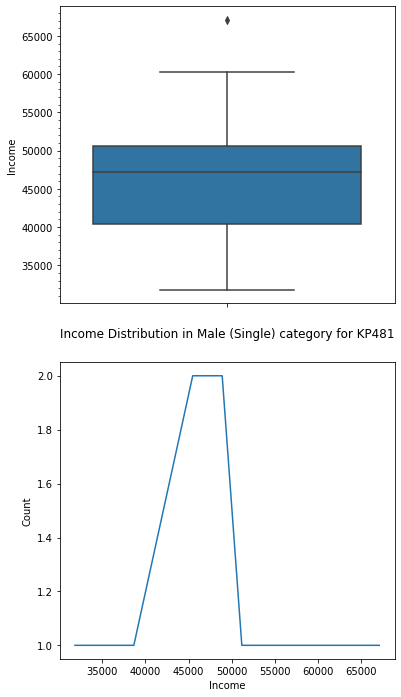

In [172]:
plt.subplots(2,1,figsize=(6,12))

plt.subplot(2,1,1)
sb.boxplot(data=aerofit_KP481_Male_MS,y='Income')
plt.minorticks_on()

# Let's also visualise if there's any correlation between higher income and more buyings.
plt.subplot(2,1,2)
sb.lineplot(x=aerofit_KP481_Male_MS['Income'].value_counts().index,y=aerofit_KP481_Male_MS['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution in Male (Single) category for KP481',pad=25)

plt.show()

In [173]:
# Let's detect the outlier values in the above visualisation.
aerofit_KP481_Male_MS[(aerofit_KP481_Male_MS['Income']>60261)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
127,KP481,34,Male,15,Single,3,3,67083,85,$1750


Comments:
1. As we can see from above, the mean income for aerofit_KP481_Male_MS category is 47071.8 USD.
2. The minimum Income is 31836 USD and maximum is 67083 USD.
3. 25th percentile is 40363.5 USD,75th percentile is 50596.5 USD and the median is 47185.5 USD.
4. Standard Deviation is 11078.2 USD, depicting great inconsistency of data, though Mean and Median vary a little, which depicts the robustness of the data.
5. We can also see from above, that, in the category aerofit_KP481_Male_MSS, there is one legitimate outlier, as demonstrated above.
6. The Line plot also depicts, that with increase in income, there's no substantial increase in buying potential of customers, in fact, customers with Incomes nearing the range 39k-51k are the ones who prefer buying the product KP481 and also are potential customers.

In [174]:
# Let's now compare all the above categories together in Product type KP481 for Income factor.
aerofit_KP481.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
80,KP481,19,Male,14,Single,3,3,31836,64,$1750
81,KP481,20,Male,14,Single,2,3,32973,53,$1750
82,KP481,20,Female,14,Partnered,3,3,34110,106,$1750
83,KP481,20,Male,14,Single,3,3,38658,95,$1750
84,KP481,21,Female,14,Partnered,5,4,34110,212,$1750


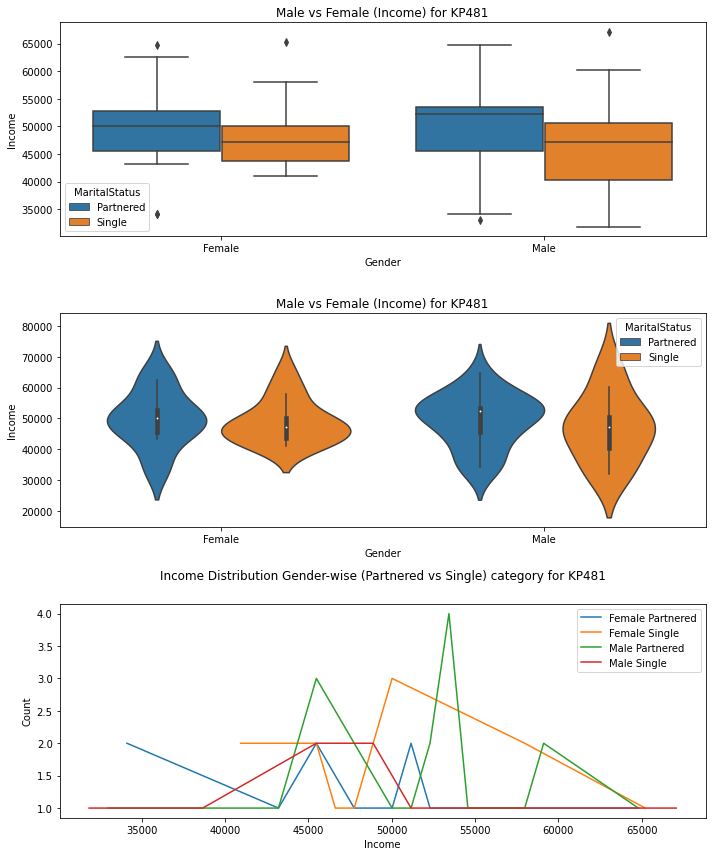

In [224]:
fig, ax = plt.subplots(3,1,figsize=(10,12))
plt.subplot(3,1,1)
sb.boxplot(data=aerofit_KP481,x='Gender',y='Income',hue='MaritalStatus')
plt.title('Male vs Female (Income) for KP481')

plt.subplot(3,1,2)
sb.violinplot(data=aerofit_KP481,x='Gender',y='Income',hue='MaritalStatus')
plt.title('Male vs Female (Income) for KP481')
plt.tight_layout()

plt.subplot(3,1,3)
sb.lineplot(x=aerofit_KP481_Female_MP['Income'].value_counts().index,y=aerofit_KP481_Female_MP['Income'].value_counts().values)
sb.lineplot(x=aerofit_KP481_Female_MS['Income'].value_counts().index,y=aerofit_KP481_Female_MS['Income'].value_counts().values)
p = sb.lineplot(x=aerofit_KP481_Male_MP['Income'].value_counts().index,y=aerofit_KP481_Male_MP['Income'].value_counts().values)
s = sb.lineplot(x=aerofit_KP481_Male_MS['Income'].value_counts().index,y=aerofit_KP481_Male_MS['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution Gender-wise (Partnered vs Single) category for KP481',pad=25)
plt.legend(labels=['Female Partnered','Female Single','Male Partnered','Male Single'])

plt.tight_layout()
plt.show()

Comments:
1. Among all the categories in Product KP481, when concerned with Income, Male Partnered and Female Partnered are the most favousrable cutomer base.
2. The favourable income bracket to target is USD 43k - 50k and 51k-54k for Male partnered and USD 43k - 47k and 50k-53k for Female single.

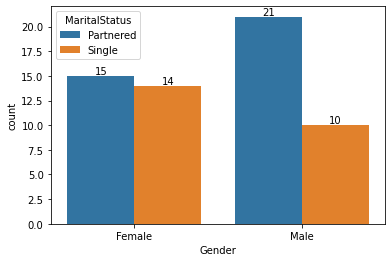

In [176]:
# Let's confirm our inference for KP481
ax = sb.countplot(data=aerofit_KP481,x='Gender',hue='MaritalStatus')
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.show()

Comments:
1. As we can seee from the above graph, Female Partnered and Male Partnered have a larger prominence over the data set for KP481. and hence our data is reaffirmed.

In [177]:
aerofit_KP481.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 80 to 139
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        60 non-null     category
 1   Age            60 non-null     int64   
 2   Gender         60 non-null     category
 3   Education      60 non-null     int64   
 4   MaritalStatus  60 non-null     category
 5   Usage          60 non-null     category
 6   Fitness        60 non-null     category
 7   Income         60 non-null     int64   
 8   Miles          60 non-null     int64   
 9   Cost           60 non-null     object  
dtypes: category(5), int64(4), object(1)
memory usage: 6.0+ KB


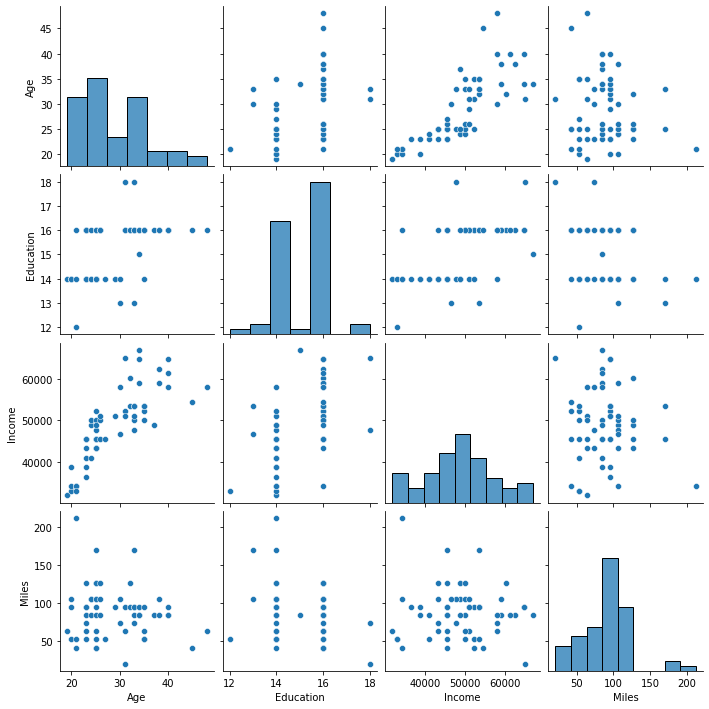

In [178]:
# Let's see if there are any prevailing relationships amongst different columns, 
# using a pairplot
sb.pairplot(data=aerofit_KP481)

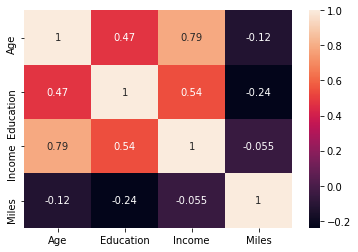

In [179]:
sb.heatmap(aerofit_KP481.corr(),annot=True)
plt.show()

Comments:
1. From the above Pairplot, we can observe that, apart from a positive relationship between Age and income, which we have already established, there are no substantial relationships between any other columns.

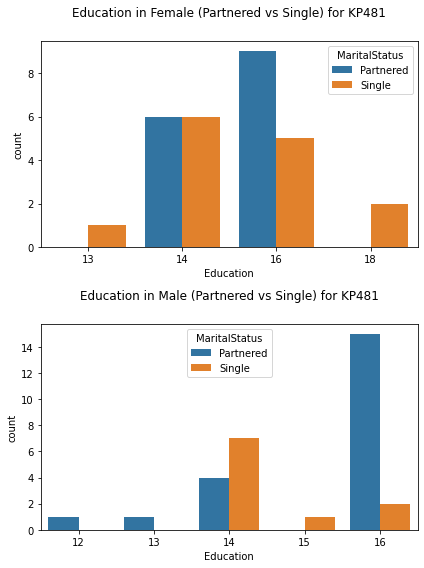

In [180]:
# Let's see in general, if other columns have any affect on buying of KP481.
# Let's start with Education column.
plt.subplots(2,1,figsize=(6,8))

plt.subplot(2,1,1)
sb.countplot(data=aerofit_KP481_Female,x='Education',hue='MaritalStatus')
plt.title('Education in Female (Partnered vs Single) for KP481',pad=25)

plt.subplot(2,1,2)
sb.countplot(data=aerofit_KP481_Male,x='Education',hue='MaritalStatus')
plt.title('Education in Male (Partnered vs Single) for KP481',pad=25)

plt.tight_layout()
plt.show()

Comments:
1. In the above graphical visualisation, it can be observed that, for Female customer base, Education till 14 years and 16 years, both in Partnered category is more prevailing, though also, in Single category 14 years Education is prevalent.
2. Whereas in Male customer base, it can be observed that, 16 years of education in Partnered category is prevailing.

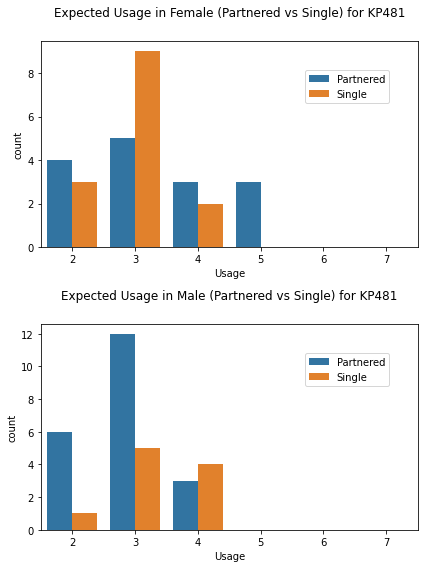

In [181]:
# Let's now analyse Usage column.
plt.subplots(2,1,figsize=(6,8))

plt.subplot(2,1,1)
sb.countplot(data=aerofit_KP481_Female,x='Usage',hue='MaritalStatus')
plt.title('Expected Usage in Female (Partnered vs Single) for KP481',pad=25)
plt.legend(loc=(0.7,0.7))

plt.subplot(2,1,2)
sb.countplot(data=aerofit_KP481_Male,x='Usage',hue='MaritalStatus')
plt.title('Expected Usage in Male (Partnered vs Single) for KP481',pad=25)
plt.legend(loc=(0.7,0.7))

plt.tight_layout()
plt.show()

Comments:
1. In the above graph it can be seen that, there's no concept of expected usage for 6 or 7 days, both in males and females user base, in fact in males there's no concept of expected usage for 5 days too.
2. In females, it can be observed that, in partnered category 2 to 3 days of expected usage is prominent, but in Single category, 3 days of expected usage is very prominent.
3. In Males, though it is seen, partnered category prefers to use the treadmills for 2 to 3 days per week, majority of Single Males strata also plans to use it for 3 days.

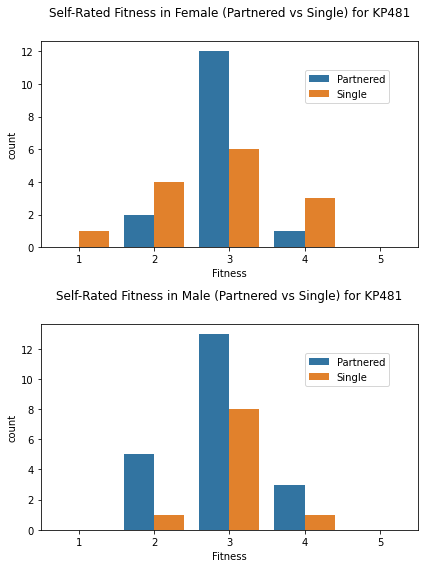

In [182]:
# Let's now analyse Fitness column for KP481
plt.subplots(2,1,figsize=(6,8))

plt.subplot(2,1,1)
sb.countplot(data=aerofit_KP481_Female,x='Fitness',hue='MaritalStatus')
plt.title('Self-Rated Fitness in Female (Partnered vs Single) for KP481',pad=25)
plt.legend(loc=(0.7,0.7))

plt.subplot(2,1,2)
sb.countplot(data=aerofit_KP481_Male,x='Fitness',hue='MaritalStatus')
plt.title('Self-Rated Fitness in Male (Partnered vs Single) for KP481',pad=25)
plt.legend(loc=(0.7,0.7))

plt.tight_layout()
plt.show()

Comments:
1. In Female partnered category, the rating 3 has been given with maximum frequency.
2. In Male Single category as well Partnered category, both have given themselves the rating 3, also buyers of KP481 don't perceive themselves as totally unfit, as there's no single entry for 1 rating.
3. In general majority buyer doesnt perceive itself as fit and hence buys the treadmill, to attain the stated fitness.

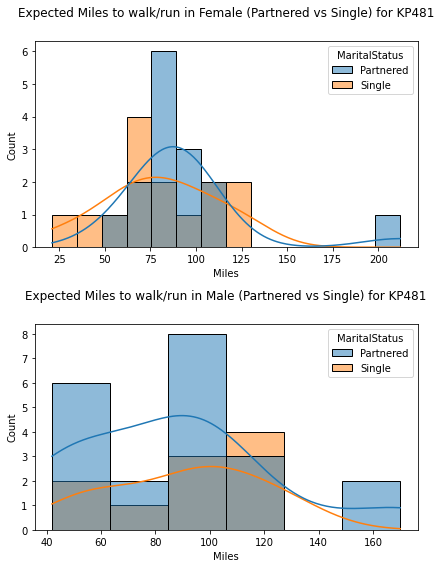

In [183]:
# Let's now analyse Miles column for KP481.
plt.subplots(2,1,figsize=(6,8))

plt.subplot(2,1,1)
sb.histplot(data=aerofit_KP481_Female,x='Miles',hue='MaritalStatus',kde=True)
plt.title('Expected Miles to walk/run in Female (Partnered vs Single) for KP481',pad=25)
# plt.legend(loc=(0.7,0.7))

plt.subplot(2,1,2)
sb.histplot(data=aerofit_KP481_Male,x='Miles',hue='MaritalStatus',kde=True)
plt.title('Expected Miles to walk/run in Male (Partnered vs Single) for KP481',pad=25)
# plt.legend(loc=(0.7,0.7))

plt.tight_layout()
plt.show()

Comments:
1. In the above graphical analysis, it can be infered that, for Female customer base, Partnered category mostly expects to walk/run 75-90 miles, where as in Single category, the expectation is 60-75 miles.
2. Further, it can be observed for male customer base, for partnered category, the expected miles are 82-106, where as for Single category it is 106-126.
3. Further, it can observed, there's no strata which prefers to walk/run for 130-200 miles in females, and 126-150 miles in males.


In [184]:
# Now Let's Analyse for product KP781 in the female category and marital status partnered.
aerofit_KP781_Female_MP.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
152,KP781,25,Female,18,Partnered,5,5,61006,200,$2500
162,KP781,28,Female,18,Partnered,6,5,92131,180,$2500
167,KP781,30,Female,16,Partnered,6,5,90886,280,$2500
171,KP781,33,Female,18,Partnered,4,5,95866,200,$2500


In [185]:
aerofit_KP781_Female_MP.shape

(4, 10)

In [186]:
# Probability of this category of buying KP781:
print(f'{100*(aerofit_KP781_Female_MP.shape[0]/aerofit.shape[0])}%')

2.2222222222222223%


Comments:
1. As the data for this category is too little. There's no point in exploring this category.
It's small number of just 4 entries or 2.22 probability demonstrates its insignificance.

In [187]:
# Let's now analyse the Dataframe with Gender Female, in KP781 product category,
# but marital status as Single.
aerofit_KP781_Female_MS.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
144,KP781,23,Female,18,Single,5,4,53536,100,$2500
148,KP781,24,Female,16,Single,5,5,52291,200,$2500
157,KP781,26,Female,21,Single,4,3,69721,100,$2500


In [188]:
aerofit_KP781_Female_MS.shape

(3, 10)

In [189]:
# Probability of this category of buying KP481:
print(f'{100*(aerofit_KP781_Female_MS.shape[0]/aerofit.shape[0])}%')

1.6666666666666667%


Comments:
As the data for this category is too little. There's no point in exploring this category. It's small number of just 3 entries or 1.6% probability demonstrates its insignificance.

In [190]:
# Let's now analyse the aeraerofit_KP781_Male_MP category.
aerofit_KP781_Male_MP.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
147,KP781,24,Male,18,Partnered,4,5,57271,80,$2500
150,KP781,25,Male,16,Partnered,4,5,49801,120,$2500
151,KP781,25,Male,16,Partnered,4,4,62251,160,$2500
153,KP781,25,Male,18,Partnered,4,3,64741,100,$2500
154,KP781,25,Male,18,Partnered,6,4,70966,180,$2500


In [191]:
aerofit_KP781_Male_MP.shape

(19, 10)

In [192]:
# Probability of this category of buying KP281:
print(f'{100*(aerofit_KP781_Male_MP.shape[0]/aerofit.shape[0])}%')

10.555555555555555%


In [193]:
# Probability of this category of buying KP281 within the category:
print(f'{100*(aerofit_KP781_Male_MP.shape[0]/aerofit_KP781.shape[0])}%')

47.5%


Comments:
1. It is prominent from above that, the customers belonging to aerofit_KP781_Male_MP category are in somewhat substantial strength, ie, 19 in number, out of 180, amounting to a probability of 10.5% for Treadmill KP781 being bought by this category, and 47.5% within the category.

In [194]:
# Let's analyse the Age column for aerofit_KP781_Male_MP.
aerofit_KP781_Male_MP['Age'].describe()

count    19.00000
mean     30.00000
std       7.18022
min      24.00000
25%      25.00000
50%      27.00000
75%      30.50000
max      48.00000
Name: Age, dtype: float64

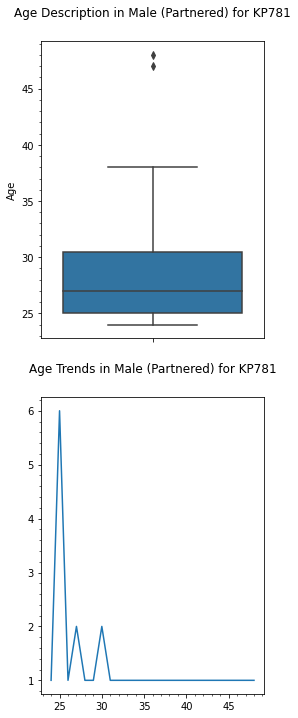

In [195]:
# Let's plot a boxplot graph of the current category and visualise the description, 
# and also see if there are any outliers.
fig,ax = plt.subplots(2,1,figsize=(4,12))

plt.subplot(2,1,1)
sb.boxplot(data=aerofit_KP781_Male_MP,y='Age')
plt.title('Age Description in Male (Partnered) for KP781', pad=25)
plt.minorticks_on()

plt.subplot(2,1,2)
sb.lineplot(x=aerofit_KP781_Male_MP['Age'].value_counts().index,y=aerofit_KP781_Male_MP['Age'].value_counts().values)
plt.minorticks_on()
plt.title('Age Trends in Male (Partnered) for KP781', pad=25)

plt.show()

In [196]:
# Let's see the outlier values which have been highlighted in the boxplot above.
aerofit_KP781_Male_MP[aerofit_KP781_Male_MP['Age']>38]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
178,KP781,47,Male,18,Partnered,4,5,104581,120,$2500
179,KP781,48,Male,18,Partnered,4,5,95508,180,$2500


Comments:
1. As we can see from above, the mean age for aerofit_KP481_Male_MP category is 30 years.
2. The minimum age is 24 years and maximum is 48 years.
3. 25th percentile is 25 years,75th percentile is 30 years and the median is 27 years.
4. Standard Deviation is 7.2 years, depicting inconsistency of data, also Mean and Median vary a lot, which depicts the non robustness of the data, so we'll follow median instead of the mean.
5. We can see from above, that, in the category aerofit_KP481_Male_MP, there are two legitimate outliers, which have been demonstrated.
6. According to line graph, Age range of 24-36 has the most prominance than the rest of data set.

In [197]:
# Let's now analyse the aeraerofit_KP781_Male_MS category.
aerofit_KP781_Male_MS.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
140,KP781,22,Male,14,Single,4,3,48658,106,$2500
141,KP781,22,Male,16,Single,3,5,54781,120,$2500
142,KP781,22,Male,18,Single,4,5,48556,200,$2500
143,KP781,23,Male,16,Single,4,5,58516,140,$2500
145,KP781,23,Male,16,Single,4,5,48556,100,$2500


In [198]:
aerofit_KP781_Male_MS.shape

(14, 10)

In [199]:
# Probability of this category of buying KP781:
print(f'{100*(aerofit_KP781_Male_MS.shape[0]/aerofit.shape[0])}%')

7.777777777777778%


In [200]:
# Probability of this category of buying KP781 within the category:
print(f'{100*(aerofit_KP781_Male_MS.shape[0]/aerofit_KP781.shape[0])}%')

35.0%


Comments:
1. It is prominent from above that, the customers belonging to aerofit_KP781_Male_MS category are somewhat prominent in strength, ie, just merely 14 in number, out of 180, amounting to a probability of 7.7% for Treadmill KP781 being bought by this category, and 35% within the category.

In [201]:
# Let's analyse the Age column for aerofit_KP781_Male_MS.
aerofit_KP781_Male_MS['Age'].describe()

count    14.000000
mean     28.928571
std       8.061917
min      22.000000
25%      23.000000
50%      25.500000
75%      32.750000
max      45.000000
Name: Age, dtype: float64

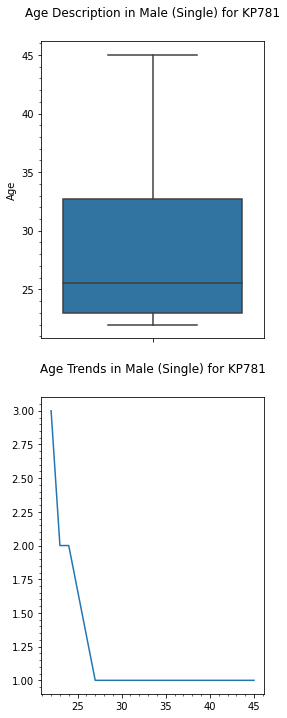

In [202]:
# Let's plot a boxplot graph of the current category and visualise the description, 
# and also see if there are any outliers.
fig,ax = plt.subplots(2,1,figsize=(4,12))

plt.subplot(2,1,1)
sb.boxplot(data=aerofit_KP781_Male_MS,y='Age')
plt.title('Age Description in Male (Single) for KP781', pad=25)
plt.minorticks_on()

plt.subplot(2,1,2)
sb.lineplot(x=aerofit_KP781_Male_MS['Age'].value_counts().index,y=aerofit_KP781_Male_MS['Age'].value_counts().values)
plt.minorticks_on()
plt.title('Age Trends in Male (Single) for KP781', pad=25)

plt.show()

Comments:
1. As we can see from above, the mean age for aerofit_KP781_Male_MS category is 28.9 years.
2. The minimum age is 22 years and maximum is 45 years.
3. 25th percentile is 23 years,75th percentile is 32.75 years and the median is 25.5 years.
4. Standard Deviation is 8 years, which is comparatively a lot, depicting inconsistency of data, also Mean and Median vary by a large difference, which depicts the non robustness of the data, so we'll take median as identifier for this dataset.
5. We can also see from above, that, in the category aerofit_KP781_Male_MS, there is no legitimate outlier.
6. Also, in accordance with the line graph, age ranges 22-27 have the most prominence.

In [203]:
# Let's visualy compare the two categories now.
aerofit_KP781_Male.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Cost
140,KP781,22,Male,14,Single,4,3,48658,106,$2500
141,KP781,22,Male,16,Single,3,5,54781,120,$2500
142,KP781,22,Male,18,Single,4,5,48556,200,$2500
143,KP781,23,Male,16,Single,4,5,58516,140,$2500
145,KP781,23,Male,16,Single,4,5,48556,100,$2500


In [204]:
aerofit_KP781_Male.shape

(33, 10)

<ipython-input-205-e4211983bec0>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,2)


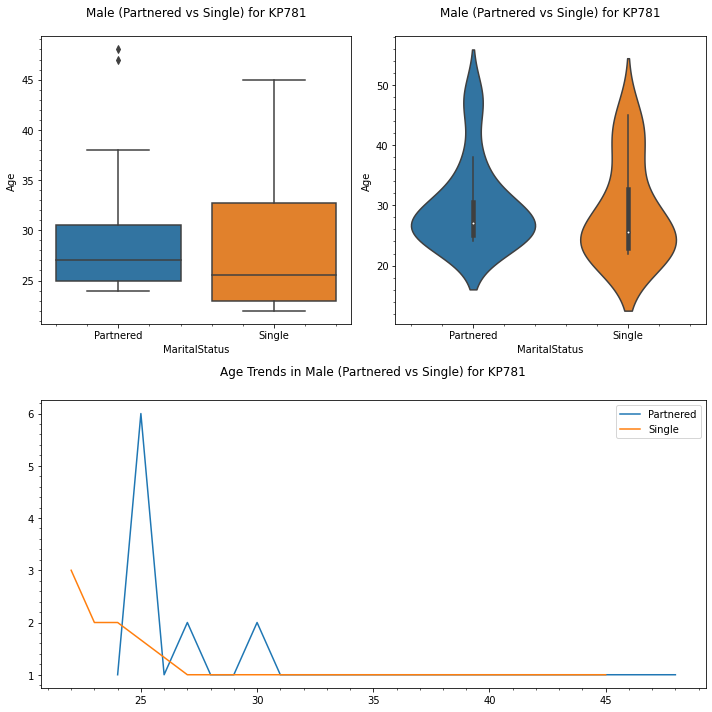

In [205]:
fig,ax = plt.subplots(2,2,figsize=(10,10))

plt.subplot(2,2,1)
sb.boxplot(data=aerofit_KP781_Male,y='Age',x='MaritalStatus')
plt.title('Male (Partnered vs Single) for KP781',pad=20)
plt.minorticks_on()

plt.subplot(2,2,2)
sb.violinplot(data=aerofit_KP781_Male,y='Age',x='MaritalStatus')
plt.minorticks_on()
plt.title('Male (Partnered vs Single) for KP781',pad=20)

plt.subplot(2,1,2)
sb.lineplot(x=aerofit_KP781_Male_MP['Age'].value_counts().index,y=aerofit_KP781_Male_MP['Age'].value_counts().values)
sb.lineplot(x=aerofit_KP781_Male_MS['Age'].value_counts().index,y=aerofit_KP781_Male_MS['Age'].value_counts().values)
plt.title('Age Trends in Male (Partnered vs Single) for KP781', pad=25)
plt.legend(labels=['Partnered','Single'])
plt.minorticks_on()

plt.tight_layout()
plt.show()

Comments:
1. From above comparison we can infer that, the violin plot depicts the density of Partnered Male for KP781 is more than density of Single Male in KP781 category.
2. Also if we are talking about individual catgeries, over all, Partnered Male category in the age range of 24-26 is very strongly prevailing.

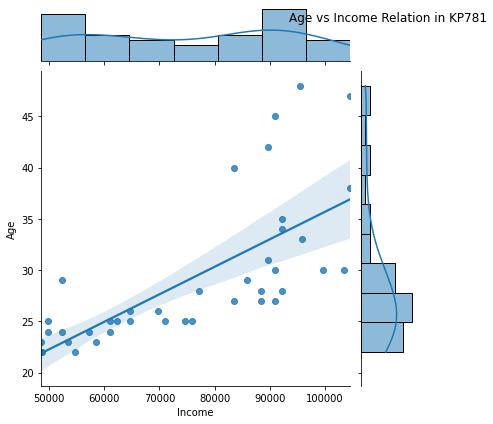

In [206]:
# Let's establish a relation between age and income and see,
# if the relation is positive or negative.
sb.jointplot(x=aerofit_KP781['Income'],y=aerofit_KP781['Age'],kind='reg')
plt.title('Age vs Income Relation in KP781', pad=50)
plt.show()

Comments:
As we can see from above, there's a strong positive relation between Age and income and hence, high age may lead to higher buying capacity.
Let's see, what's the behavior of INCOME in the product type KP481 in various categories.

In [207]:
# Let's Continue with aerofit_KP781_Male_MP category.
# Let's analyse the income distribution of this category
# As Female data is insignificant, we'll analyse the male data.
aerofit_KP781_Male_MP['Income'].describe()

count        19.000000
mean      81431.368421
std       16811.472400
min       49801.000000
25%       67853.500000
50%       83416.000000
75%       93819.500000
max      104581.000000
Name: Income, dtype: float64

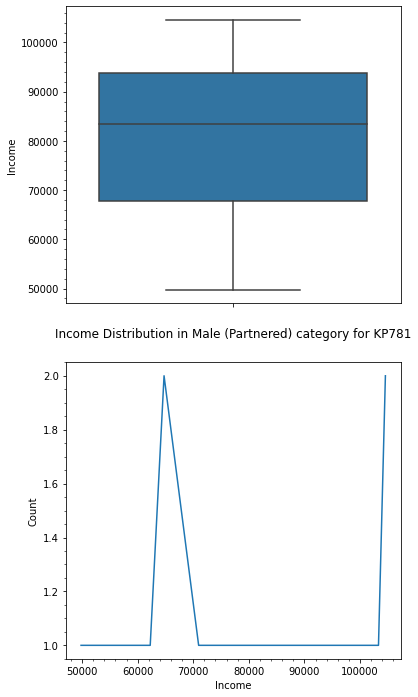

In [208]:
plt.subplots(2,1,figsize=(6,12))

plt.subplot(2,1,1)
sb.boxplot(data=aerofit_KP781_Male_MP,y='Income')
plt.minorticks_on()

# Let's also visualise if there's any correlation between higher income and more buyings.
plt.subplot(2,1,2)
sb.lineplot(x=aerofit_KP781_Male_MP['Income'].value_counts().index,y=aerofit_KP781_Male_MP['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution in Male (Partnered) category for KP781',pad=25)
plt.minorticks_on()

plt.show()

Comments:
1. As we can see from above, the mean income for aerofit_KP781_Male_MP category is 81431.3 USD.
2. The minimum Income is 49801 USD and maximum is 104581 USD.
3. 25th percentile is 67853.5 USD,75th percentile is 93819.5 USD and the median is 83416 USD.
4. Standard Deviation is 16811.47 USD, depicting great inconsistency of data, also Mean and Median vary a lot, which depicts the non robustness of the data, so we will follow median.
5. We can also see from above, that, in the category aerofit_KP781_Male_MP, there is no legitimate outlier.
6. The Line plot also depicts, that with increase in income, there's no substantial increase in buying potential of customers, in fact, customers with Incomes nearing the range 62k - 72k, and 1L+ are the ones who prefer buying the product KP781 and also are potential customers. Depicting customers with a higher paying capacity prefer KP781.

In [209]:
# Let's Continue with aerofit_KP781_Male_MS category.
# Let's analyse the income distribution of this category
aerofit_KP781_Male_MS['Income'].describe()

count       14.000000
mean     68216.428571
std      18943.765237
min      48556.000000
25%      50423.250000
50%      59761.000000
75%      88396.000000
max      92131.000000
Name: Income, dtype: float64

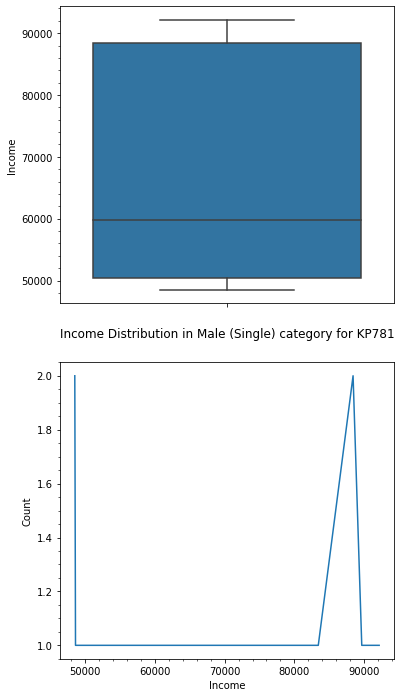

In [210]:
plt.subplots(2,1,figsize=(6,12))

plt.subplot(2,1,1)
sb.boxplot(data=aerofit_KP781_Male_MS,y='Income')
plt.minorticks_on()

# Let's also visualise if there's any correlation between higher income and more buyings.
plt.subplot(2,1,2)
sb.lineplot(x=aerofit_KP781_Male_MS['Income'].value_counts().index,y=aerofit_KP781_Male_MS['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution in Male (Single) category for KP781',pad=25)
plt.minorticks_on()

plt.show()

Comments:
1. As we can see from above, the mean income for aerofit_KP781_Male_MS category is 68216.4 USD.
2. The minimum Income is 48556 USD and maximum is 92131 USD.
3. 25th percentile is 50423.25 USD,75th percentile is 88396 USD and the median is 59761 USD.
4. Standard Deviation is 18943 USD, depicting great inconsistency of data, also Mean and Median vary a lot, which depicts the non robustness of the data.
5. We can also see from above, that, in the category aerofit_KP781_Male_MSS, there is no legitimate outlier.
6. The Line plot also depicts, that with increase in income, there's no substantial increase in buying potential of customers, in fact, customers with Incomes nearing the range 84k-90k, and 48k, are the ones who prefer buying the product KP781 and also are potential customers.

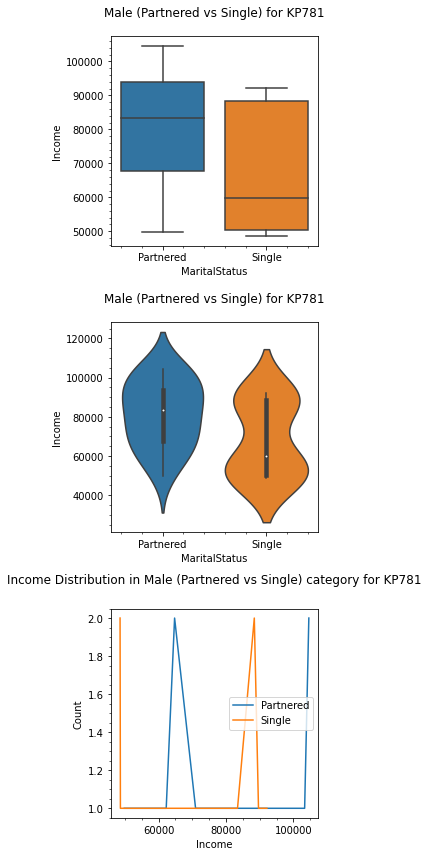

In [225]:
# Let's now compare the incomes of both these categories.
fig, ax = plt.subplots(3,1,figsize=(4,12))
plt.subplot(3,1,1)
sb.boxplot(data=aerofit_KP781_Male,y='Income',x='MaritalStatus')
plt.title('Male (Partnered vs Single) for KP781',pad=20)
plt.minorticks_on()

plt.subplot(3,1,2)
sb.violinplot(data=aerofit_KP781_Male,y='Income',x='MaritalStatus')
plt.minorticks_on()
plt.title('Male (Partnered vs Single) for KP781',pad=20)

plt.subplot(3,1,3)
sb.lineplot(x=aerofit_KP781_Male_MP['Income'].value_counts().index,y=aerofit_KP781_Male_MP['Income'].value_counts().values)
sb.lineplot(x=aerofit_KP781_Male_MS['Income'].value_counts().index,y=aerofit_KP781_Male_MS['Income'].value_counts().values)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution in Male (Partnered vs Single) category for KP781',pad=25)
plt.legend(labels=['Partnered','Single'])
plt.minorticks_on()

plt.tight_layout()
plt.show()

Comments:
1. From the above distributions, it can be observed that, the range of income amongst Male customers in partnered category is higher, than that of the Single category, though the median in Single category is way lower.
2. Male partnered category according to the violin plot is more dense and hence depicting a wider customer base.
3. Line Chart distribution graph depicts that, for single category, income range of 84k - 90k and 62k - 72k for partnered category have the most potential for buying the product KP781.

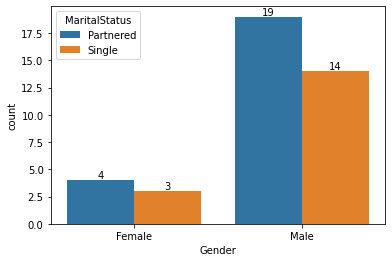

In [212]:
# Let's re confirm our inferences for KP781
ax = sb.countplot(data=aerofit_KP781,x='Gender',hue='MaritalStatus')
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.show()

Comments:
As we can see from the above graph, Female category has miniscule interest in buying KP781, hence we have concentrated on Male Category, where, Male Partnered category have a larger prominence over the data set for KP781, and hence our data is reaffirmed.

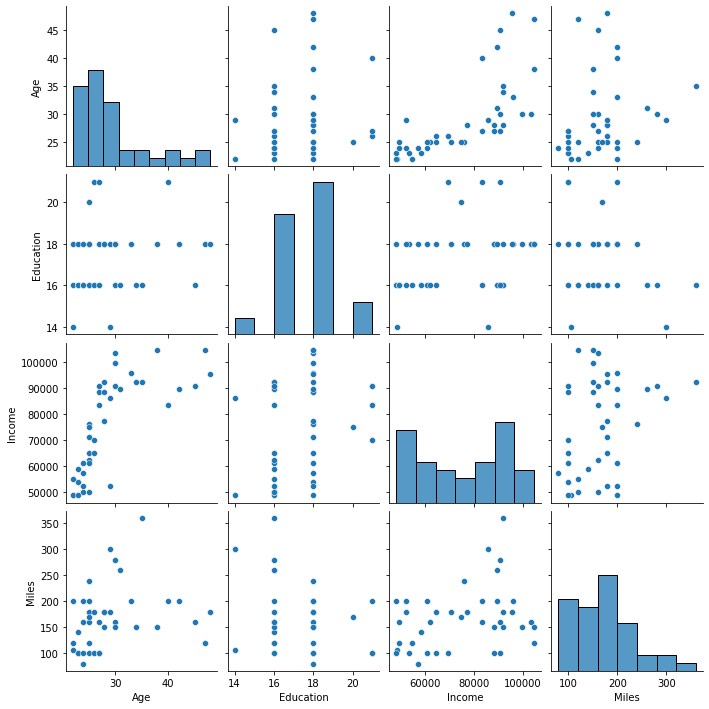

In [213]:
# Let's see if there are any prevailing relationships amongst different columns, 
# using a pairplot
sb.pairplot(data=aerofit_KP781)

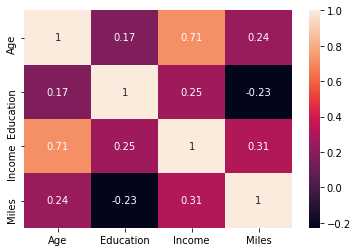

In [214]:
sb.heatmap(aerofit_KP781.corr(),annot=True)
plt.show()

Comments:
From the above Pairplot, we can observe that, apart from a positive relationship between Age and income, there are no substantial relationships between any other columns.

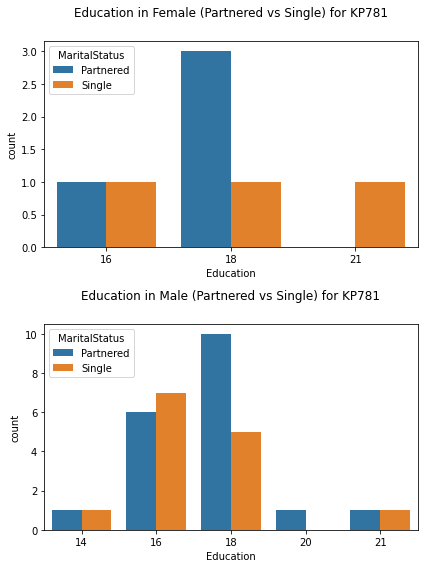

In [215]:
# Let's see in general, if other columns have any affect on buying of KP781.
# Let's start with Education column.
plt.subplots(2,1,figsize=(6,8))

plt.subplot(2,1,1)
sb.countplot(data=aerofit_KP781_Female,x='Education',hue='MaritalStatus')
plt.title('Education in Female (Partnered vs Single) for KP781',pad=25)

plt.subplot(2,1,2)
sb.countplot(data=aerofit_KP781_Male,x='Education',hue='MaritalStatus')
plt.title('Education in Male (Partnered vs Single) for KP781',pad=25)

plt.tight_layout()
plt.show()

Comments:
1. In the above graphical visualisation, it can be observed that, for Female customer base, Education till 18 years is prominent, Also in Male Partnered category, Education till 18 years and 16 years are prevailing, though also, in Single category for males 16 years Education is prevalent.
2. It is very intriguing though, categories with higher income brackets, dont have education till just 12 years or 14 years. Meaning more education corresponds to more income.

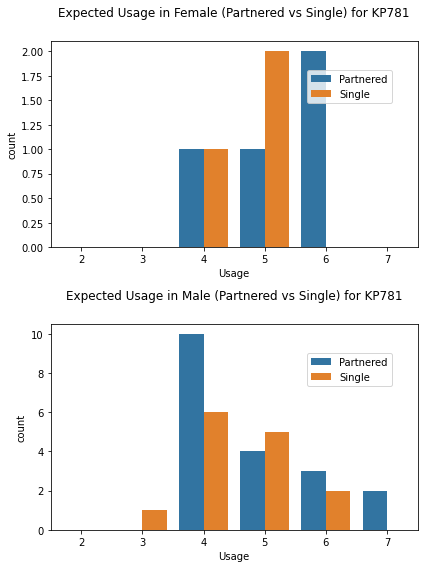

In [216]:
# Let's now analyse Usage column.
plt.subplots(2,1,figsize=(6,8))

plt.subplot(2,1,1)
sb.countplot(data=aerofit_KP781_Female,x='Usage',hue='MaritalStatus')
plt.title('Expected Usage in Female (Partnered vs Single) for KP781',pad=25)
plt.legend(loc=(0.7,0.7))

plt.subplot(2,1,2)
sb.countplot(data=aerofit_KP781_Male,x='Usage',hue='MaritalStatus')
plt.title('Expected Usage in Male (Partnered vs Single) for KP781',pad=25)
plt.legend(loc=(0.7,0.7))

plt.tight_layout()
plt.show()

Comments:
1. In the above graph it can be seen that, there's no concept of expected usage for 2 or 3 days, both in males and females user base, in fact, very surprisingly, this category of high income tends to use the treadmill for 6-7 days as well, which was totally absent in earlier categories. Which points towards health consciousness in higher income category.
2. In females, it can be observed that, in partnered category, 6 days of expected usage is prominent, but in Single category, 5 days of expected usage is very prominent.
3. In Males, though it is seen, partnered category prefers to use the treadmills for 4 days per week, majority of Single Males strata also plans to use it for 4 days.

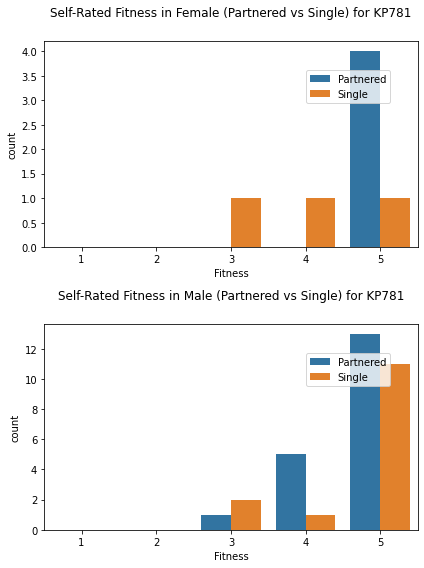

In [217]:
# Let's now analyse Fitness column for KP481
plt.subplots(2,1,figsize=(6,8))

plt.subplot(2,1,1)
sb.countplot(data=aerofit_KP781_Female,x='Fitness',hue='MaritalStatus')
plt.title('Self-Rated Fitness in Female (Partnered vs Single) for KP781',pad=25)
plt.legend(loc=(0.7,0.7))

plt.subplot(2,1,2)
sb.countplot(data=aerofit_KP781_Male,x='Fitness',hue='MaritalStatus')
plt.title('Self-Rated Fitness in Male (Partnered vs Single) for KP781',pad=25)
plt.legend(loc=(0.7,0.7))

plt.tight_layout()
plt.show()

Comments:
1. In Female partnered category, the rating 5 has been given with maximum frequency.
2. In Male Single category as well Partnered category, both have given themselves the rating 5, also buyers of KP781 perceive themselves as totally fit, as there's no single entry for 1 rating.
3. In general majority buyer perceives itself as very fit and hence buys the treadmill, to continue the stated fitness.

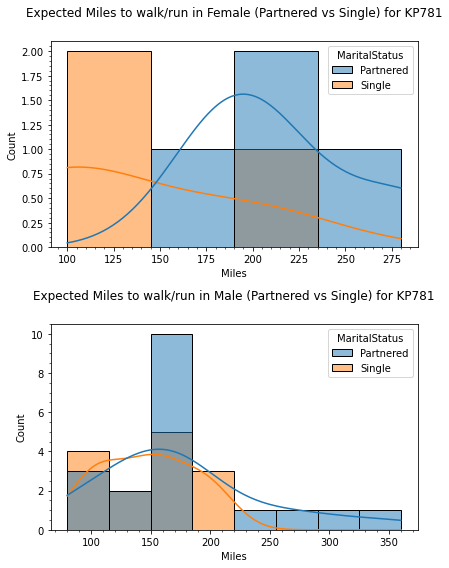

In [218]:
# Let's now analyse Miles column for KP481.
plt.subplots(2,1,figsize=(6,8))

plt.subplot(2,1,1)
sb.histplot(data=aerofit_KP781_Female,x='Miles',hue='MaritalStatus',kde=True)
plt.title('Expected Miles to walk/run in Female (Partnered vs Single) for KP781',pad=25)
plt.minorticks_on()
# plt.legend(loc=(0.7,0.7))

plt.subplot(2,1,2)
sb.histplot(data=aerofit_KP781_Male,x='Miles',hue='MaritalStatus',kde=True)
plt.title('Expected Miles to walk/run in Male (Partnered vs Single) for KP781',pad=25)
plt.minorticks_on()
# plt.legend(loc=(0.7,0.7))

plt.tight_layout()
plt.show()

Comments:
1. In the above graphical analysis, it can be infered that, for Female customer base, Partnered category mostly expects to walk/run 190-235 miles, where as in Single category, the expectation is 100-145 miles.
2. Further, it can be observed for male customer base, for partnered category as well ass for single category, the expected miles are 150-185.

# BUSINESS INSIGHTS

1. There are 3 types of Products, ie, KP281, KP481 and KP781. The number of orders for KP281 is 80, which is maximum, followed by KP481(60) and KP781(40).

2. AGE -
1) For the over all data set, The mean age is 28.78 years, where the median is 26 years. 25th percentile is 24 years,and 75th percentile is 33 years. The mode for column Age is 25 with frequency 25.
2) Among all the categories in Product KP281, when concerned with age, Male Partnered is the most favousrable cutomer base.The favourable age to target is 24 to 36.
3) Among all the categories in Product KP481, when concerned with Age, Male Partnered and Female Single are the most favousrable cutomer base. The favourable Age bracket to target is 21-31 for Male partnered and 24-26 for Female single.
4) The density of Partnered Male for KP781 is more than density of Single Male in KP781 category. The number of female strata for KP781 Product is very insignificant, hence we are only focusing on male strata. Also if we are talking about individual catgeries, over all, Partnered Male category in the age range of 24-26 is very strongly prevailing.

3. GENDER - 
1) There are in total 104 Male Customers and 76 Female Customers. We can also infer that Aerofit's buyer landscape is occupied majorly by Male Customers, 57.8% customers are male and 42.2% customers are female.

4. EDUCATION - 
1) The minimum number of years that a customer has studied is 12 years, and maximum number of years a customer has studied for is 21 years.
2) The mean number of years 15.5 years. The median for the above data is 16, which is very close to mean. The 25th percentile is marked at 14 years, Median at 16 years and 75th percetile also at 16 years. People with an education of 20,21 years are an exception. 16 years of education is the mode with frequency 85.
3) KP281 - For Female customer base, Education till 14 years and 16 years, both in Partnered category is more prevailing. Whereas in Male customer base, 16 years of education in Partnered category is prevailing.
4) KP481 - for Female customer base, Education till 14 years and 16 years, both in Partnered category is more prevailing, though also, in Single category 14 years Education is prevalent. Whereas in Male customer base, it can be observed that, 16 years of education in Partnered category is prevailing.
5) KP781 - for Female customer base, Education till 18 years is prominent, Also in Male Partnered category, Education till 18 years and 16 years are prevailing, though also, in Single category for males 16 years Education is prevalent.

5. MARITAL STATUS -
1) There are in total 107 Partenered Customers and 73 Single Customers.
2) We can also infer that Aerofit's buyer landscape is occupied majorly by Partnered Customers, where, 59.4% customers are Partnered and 40.6% customers are Single, indicating a wider user base of married off customers. A close inspection of the crosstab also infers that, not only all over but in individual categorie of product also, partnered customers are more in numbers.

6. EXPECTED USAGE - 
1) Usage of 3 days a week is the most prominent, followed by 4 days.
2) It's also surprising to notice that, for Products KP281 and KP481, there's not a single customer who prefers to use the treadmilss for 6 or 7 days, where as in KP781, using the treadmil of 2 days is not at all a concept. We'll discuss later how individually in each category, which uasge slab is most prefered.

7. FITNESS RATING - 
1) Fitness rating 3 is the most prominent, though individually, in KP281 and KP481, rating 3 is prominent, but in KP781, rating 5 is more prominent.
2) KP281 - In Female partnered category, the rating 3 has been given with maximum frequency. In Male Single category as well Partnered category, both have given themselves the rating 3. In general majority buyer doesnt perceive itself as fit and hence buys the treadmill, to attain the stated fitness.
3) KP481 - In Female partnered category, the rating 3 has been given with maximum frequency. In Male Single category as well Partnered category, both have given themselves the rating 3, also buyers of KP481 don't perceive themselves as totally unfit, as there's no single entry for 1 rating. In general, majority buyer doesnt perceive itself as fit and hence buys the treadmill, to attain the stated fitness.
4) KP781 - In Female partnered category, the rating 5 has been given with maximum frequency. In Male Single category as well Partnered category, both have given themselves the rating 5, also buyers of KP781 perceive themselves as totally fit, as there's no single entry for 1 rating. In general majority buyer perceives itself as very fit and hence buys the treadmill, to continue the stated fitness.

8. INCOME -
1) The over all mean, median and mode for the above distribution are 53719.57, 50596.5 and 45480 USD respectively. The mean and median vary by a considerable amount, indicating towards non robustness of mean and hence we have relied on median for our analysis.
2) Also the standard deviation is 16506.6, which is huge and hence points towards inconsistency of the data. There are a plethora of outliers for the over all income distribution.
3) Among all the categories in Product KP281, when concerned with Income, Female Partnered and Male Single are the most favourable customer base. The favourable income bracket to target is USD 45k - 48k for Female partnered and USD 52k - 55k for Male single.
4) Among all the categories in Product KP481, when concerned with Income, Male Partnered and Female Partnered are the most favousrable cutomer base. The favourable income bracket to target is USD 43k - 50k and 51k-54k for Male partnered and USD 43k - 47k and 50k-53k for Female single.
5) The range of income amongst Male customers in partnered category for KP781 is higher, than that of the Single category, though the median in Single category is way lower. Male partnered category is more dense and hence depicting a wider customer base. For single category, income range of 84k - 90k, and 62k - 72k for partnered category have the most potential for buying the product KP781.

9. MILES - 
1) For the over all data, customers expectations for the number of miles they are going to use the treadmills for is peaking at 85 miles.
2) KP281 - for Female customer base, Partnered category mostly expects to walk/run 55-70 miles, where as in Single category, the expectation is 70-90 miles. Further, it can be observed for male customer base, for partnered category, the expected miles are 62-80, where as for Single category it is 80-100.
3) KP481 - for Female customer base, Partnered category mostly expects to walk/run 75-90 miles, where as in Single category, the expectation is 60-75 miles. Further, it can be observed for male customer base, for partnered category, the expected miles are 82-106, where as for Single category it is 106-126. Further, it can observed, there's no strata which prefers to walk/run for 130-200 miles in females, and 126-150 miles in males.
4) KP781 - for Female customer base, Partnered category mostly expects to walk/run 190-235 miles, where as in Single category, the expectation is 100-145 miles. Further, it can be observed for male customer base, for partnered category as well ass for single category, the expected miles are 150-185.

10. Correlations among different columns of the given Dataframe is meagre. Only substantial correlation existing is between Age and Income columns, both in over all and individual categories.

11. It is very intriguing though, categories with higher income brackets, dont have education till just 12 years or 14 years. Meaning more education corresponds to more income.

# RECOMMENDATIONS

1. For the KP281 Product type, Aerofit should target Female partnered category and Male partnered category belonging to age ranges 19-35 years and 24-36 respectively, belonging to income brackets of 45k-48k USD and 46k-59k USD, respectively. Male Single category is also a potential category though.
2. For the KP481 Product type, Aerofit should target Male partnered category and Female partnered category belonging to age ranges 21-31 years and 23-26 and 31-34 years respectively, belonging to income brackets of 43k - 50k and 51k-54k for Male partnered and USD 43k - 47k and 50k-53k for Female partnered. Female Single category is also a potential category though.
3. There's no doubt that for the KP781 product type, Male partnered and male single category are the most prominent, and even amongst them Aerofit should target male partnered, belonging to age range of 24-26 and income range of 62k - 72k.
4. Aerofit should also target people with self fitness rating of 3 or more KP281 and KP481, where as for KP781, Aerofit should strictly target customers with self fitness rating of 5.
5. It is fairly prominent that Partnered male category followed by partnered female category are the ones, Aerofit should target if they wanna target customers as an umbrella strategy.
6. It is also recommended that, Aerofit cranks up its research and development in the categories not mentioned above, because there's a huge potential buyer base lying there and it can be  availed by proper planning and execution.
7. It is also recommended that Aerofit should target the customers who prefer using the treadmills for 3-5 days in a week, for KP281 and KP481 types, where as for KP781, they should target poeple who prefer using the treadmil for 5-7 days.
8. For customers with education less than 16 years KP281 and KP481 are recommended, where as for KP781, customers with education of 16 or more are recommended.
9. In nutshell, concerning income also, Aerofit should target medium and lower income customers for KP281 and KP481, where as for KP781, they should target customers with high income.
10. Over all the Male buyer strata is more than female buyer strata, so for a better response, Aerofit shall try to target males more for each treadmill type.
11. Also, if to choose from Partnered vs Single, as is already prominent from individual analysis of each product type, Partnered category customers are more in numbers, hence they should by taregeted more.